# <font color="#1DB954"> Spotify Song & Genre Analysis, Popularity Prediction and Building a Simple Recommendation System - 58</font>

<font color="black">**Group Members:**</font>

+ Berk Sezer
+ Bilgesu Çakır
+ Deniz Can Gezgin
+ İbrahim Gürkan Yeşilbağ

## <font color="#1DB954">Introduction</font>
![](https://dsc.cloud/b45dcb/cs_210_spotify/cs_210_spotify.png)

<font color="white">
As known <font color="#1DB954">Spotify</font> become one of the most important names when it comes to music nowadays. In our project we will be working on a dataset which has more than 160k+ tracks. We will firstly conduct some analysis of the dataset. After that we will conduct a statistical analysis and test our some of our hypothesis. Finally we will predict song popularity and build a simple Recommendation System.
</font>

### <font color="#1DB954">Utilized Datasets</font>

<font color="white">
We are using the given kaggle dataset: https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks
</font>

## <font color="#1DB954">Exploratory Data Analysis</font>


###<font color="#1DB954">Visualizations Descriptive Statistics</font>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from scipy.stats import skewnorm, norm
import math
import re

# displaying option
pd.set_option('max_rows', 5)

%matplotlib inline

In [7]:
df = pd.read_csv("https://dsc.cloud/b45dcb/data/data.csv")
df_genres = pd.read_csv("https://dsc.cloud/b45dcb/data_by_genres/data_by_genres.csv")
df_artists = pd.read_csv("https://dsc.cloud/b45dcb/data_by_artist/data_by_artist.csv")
df_year = pd.read_csv("https://dsc.cloud/b45dcb/data_by_year/data_by_year.csv")
df_genresBig = pd.read_csv("https://dsc.cloud/b45dcb/data_w_genres/data_w_genres.csv")

In [8]:
df_genres = df_genres.dropna(how="any") # drop the rows that contains any null entry in their columns.
df_genres.drop(df_genres[df_genres['genres'] == "[]"].index, inplace = True)
df_genresBig.drop(df_genresBig[df_genresBig['genres'] == "[]"].index, inplace = True)

In [9]:
df = df.dropna(how="any") # drop the rows that contains any null entry in their columns.

We have cleared the dataframes in the upper rows.

In [10]:
def msToSec(msec):
    return float(f"{msec/1000:.2f}")

df["duration_sec"] = df["duration_ms"].apply(msToSec)

Since it is hard to read milliseconds from the graphs, we added a new column for the durations. We have used a function named msToSec to convert millisecond values in the rows to seconds and added this new row to the dataframe.

In [11]:
all_features = ["acousticness","danceability","energy", "instrumentalness", "liveness", "loudness",
            "popularity", "speechiness", "tempo", "valence", "duration_sec"]
len(all_features)

11

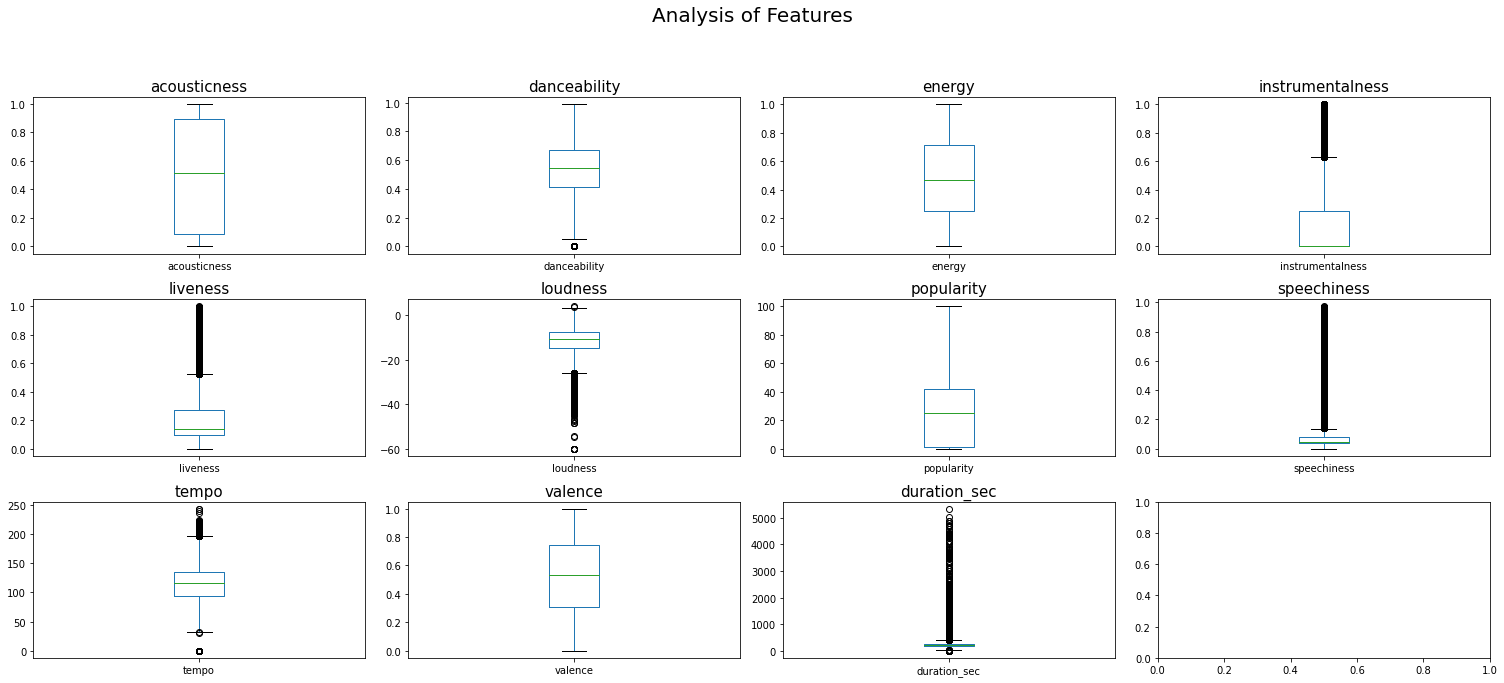

In [12]:
#before treatment
r=3
c=4

fig, axes = plt.subplots(3,4, figsize=(21,9))

for ind, item in enumerate(all_features):
  ax = axes[ind // c][ind % c]
  df[item].plot.box(ax=ax)
  ax.set_title(item, fontsize=15)



fig.suptitle("Analysis of Features", y=1.05, fontsize=20)

plt.tight_layout()

At the above boxplots we plotted some features of the data. However as seen there were plenty of outliers in some of the features so we had to take some action regarding them.

In [13]:
toBeTreated = ["instrumentalness", "liveness", "loudness", "speechiness", "tempo", "duration_sec"]

In [14]:
Q1 = df['instrumentalness'].quantile(0.25)
Q3 = df['instrumentalness'].quantile(0.75)
IQR = Q3 - Q1
df = df.query('(@Q1 - 1.5 * @IQR) <= instrumentalness <= (@Q3 + 1.5 * @IQR)')

Q1 = df['liveness'].quantile(0.25)
Q3 = df['liveness'].quantile(0.75)
IQR = Q3 - Q1
df = df.query('(@Q1 - 1.5 * @IQR) <= liveness <= (@Q3 + 1.5 * @IQR)')

Q1 = df['loudness'].quantile(0.25)
Q3 = df['loudness'].quantile(0.75)
IQR = Q3 - Q1
df = df.query('(@Q1 - 1.5 * @IQR) <= loudness <= (@Q3 + 1.5 * @IQR)')

Q1 = df['speechiness'].quantile(0.25)
Q3 = df['speechiness'].quantile(0.75)
IQR = Q3 - Q1
df = df.query('(@Q1 - 1.5 * @IQR) <= speechiness <= (@Q3 + 1.5 * @IQR)')

Q1 = df['tempo'].quantile(0.25)
Q3 = df['tempo'].quantile(0.75)
IQR = Q3 - Q1
df = df.query('(@Q1 - 1.5 * @IQR) <= tempo <= (@Q3 + 1.5 * @IQR)')

Q1 = df['duration_sec'].quantile(0.25)
Q3 = df['duration_sec'].quantile(0.75)
IQR = Q3 - Q1
df = df.query('(@Q1 - 1.5 * @IQR) <= duration_sec <= (@Q3 + 1.5 * @IQR)')

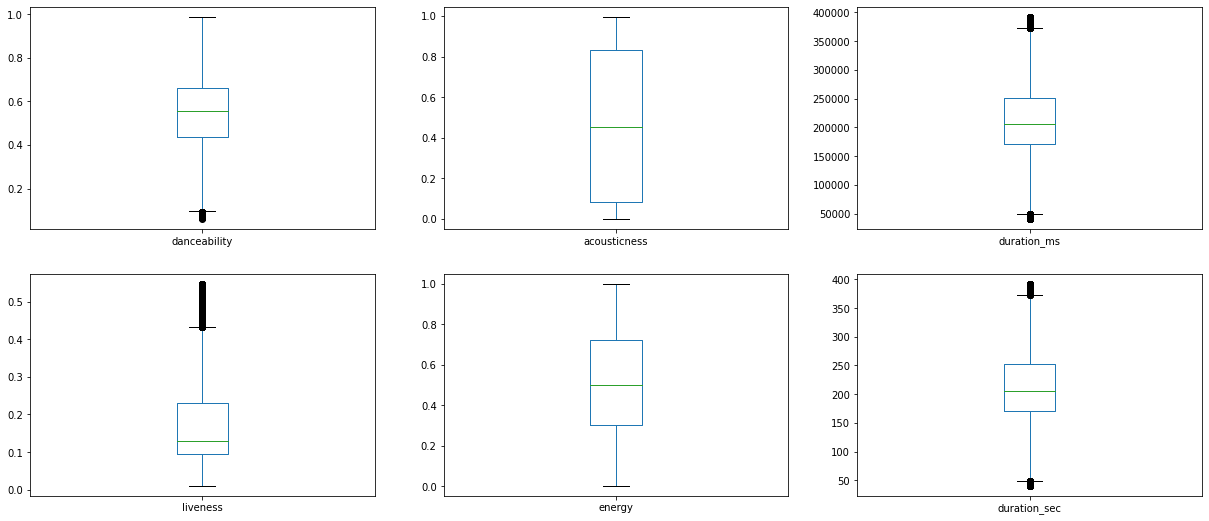

In [11]:
fig, ax = plt.subplots(2,3, figsize=(21,9))

df["danceability"].plot(kind="box", ax=ax[0][0])
df["acousticness"].plot(kind="box", ax=ax[0][1])
df["duration_ms"].plot(kind="box", ax=ax[0][2])
df["liveness"].plot(kind="box", ax=ax[1][0])
df["energy"].plot(kind="box", ax=ax[1][1])
df["duration_sec"].plot(kind="box", ax=ax[1][2])

The above image shows the box plots after we take some action. In some of the features there are still outliers but they are minimized when compared to previous charts. The box plots give us some basic information of the data we are using.

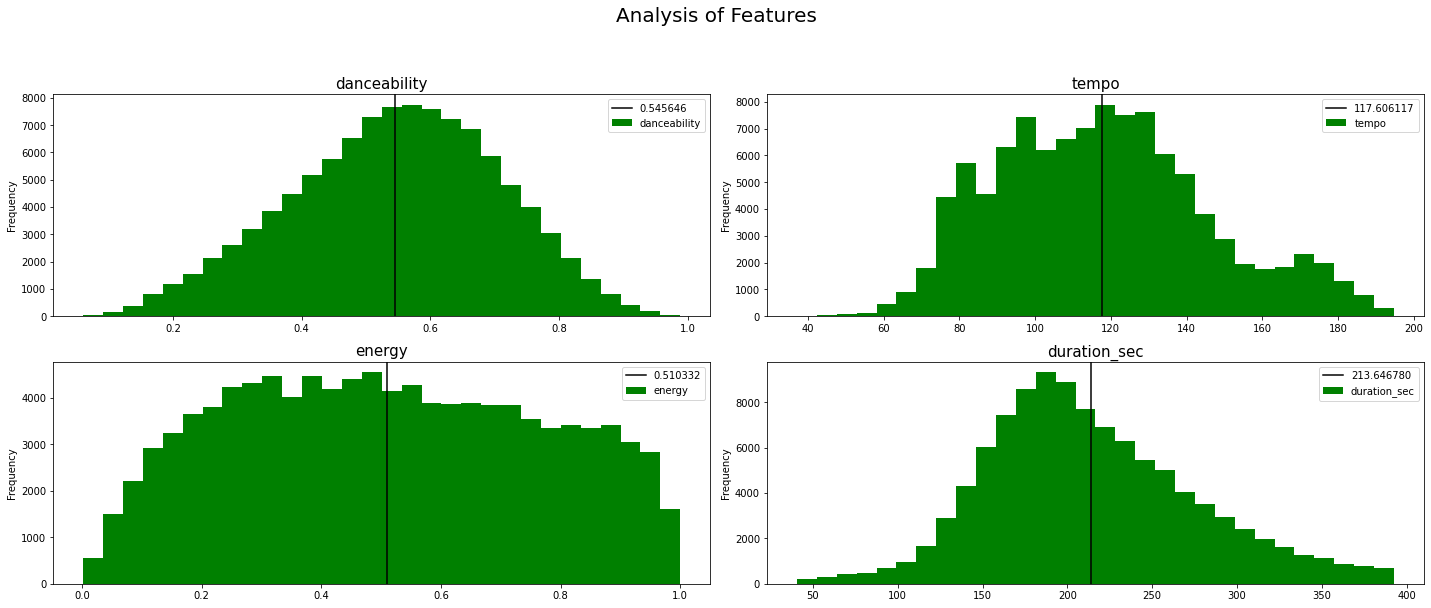

In [12]:
fig, axes = plt.subplots(2,2, figsize=(20, 8))
r = 2
c = 2

# selected features
features = ["danceability", "tempo", "energy", "duration_sec"]

for ind, item in enumerate(features):
  ax = axes[ind // c][ind % c]
  df[item].plot.hist(bins=30, ax=ax, color="green")
  ax.axvline(df[item].mean(), 0, 1, c="black",label=f'{np.mean(df[item].mean()):1f}')
  ax.legend()
  ax.set_title(item, fontsize=15)



fig.suptitle("Analysis of Features", y=1.05, fontsize=20)

plt.tight_layout()

In addition to the box plots we also wanted to show our data as histograms with the mean values which also could show better results than the box plots since with the histograms, we can see the distribution of the data.

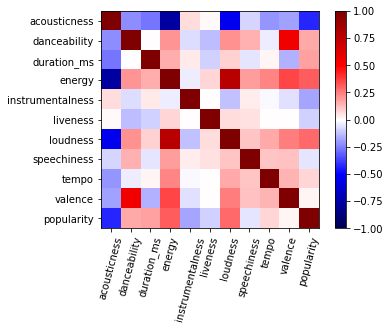

In [13]:
corrs = df[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity']].corr()


plt.imshow(corrs, cmap="seismic", vmin = -1, vmax = 1, )
plt.colorbar()
plt.xticks(range(len(corrs)),corrs.columns, rotation=75)
plt.yticks(range(len(corrs)),corrs.index)
plt.show()

The heat map created above shows us the correlations between some features of the given dataset (data.csv). Some features are not included in this heatmap if they don't have a strong negative or positive correlations with other features. Such as key, explicit, mode etc. 

Red means positive correlations and blue means negative correlations. As it can be seen from the heatmap, the most positively correlations features are <font color="#990000">**loudness and energy**</font>. The most negatively correlations features are <font color="#000066">**energy and acousticness**</font>.

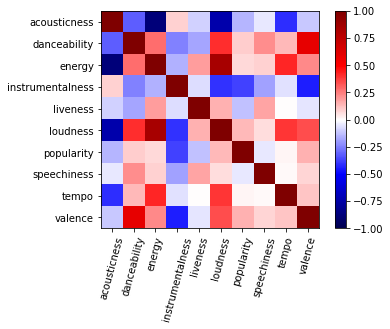

In [14]:
corrs = df_genres[["acousticness", "danceability", 
"energy", "instrumentalness", "liveness", 
"loudness","popularity","speechiness","tempo","valence"]].corr()


plt.imshow(corrs, cmap="seismic", vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks(range(len(corrs)),corrs.columns, rotation=75)
plt.yticks(range(len(corrs)),corrs.index)
plt.show()

The heatmap above shows us the correlation between df_genres' features. Like the first heatmap, the most positively correlated features are <font color="	#990000">**loudness and energy**</font>. The most negatively correlated features are <font color="#000066">**energy and acousticness**</font>. But also, there are other strong correlation unlike the first heatmap. Some feature pairs are chosen and plotted below.

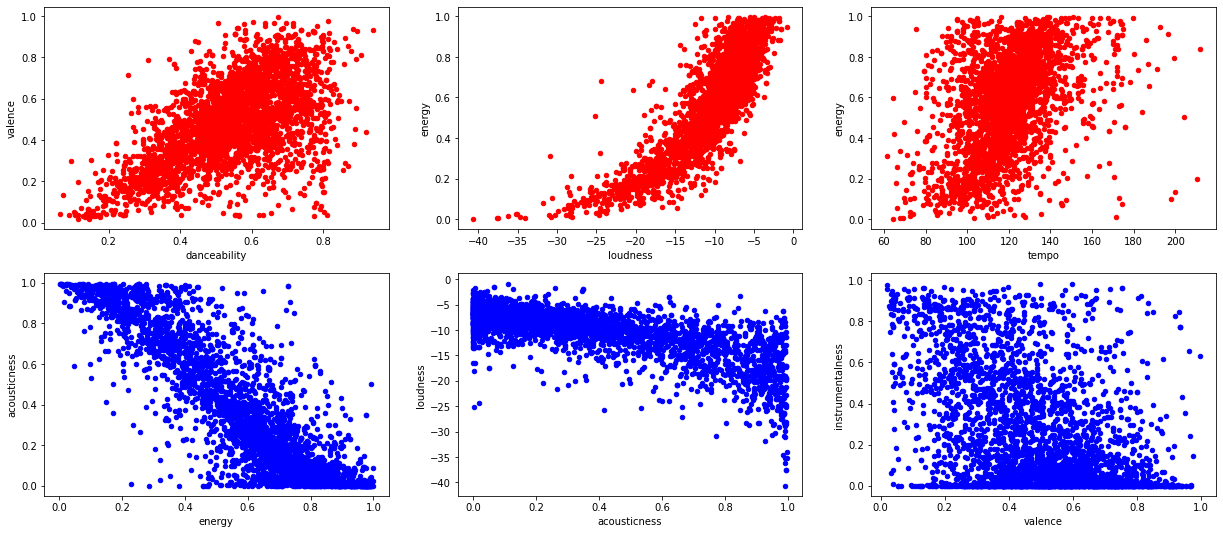

In [15]:
#graphs of highly correlated features


fig, ax = plt.subplots(2,3, figsize=(21,9))

df_genres[["danceability", "valence"]].plot.scatter(x="danceability", y="valence", ax=ax[0][0], color="red")
df_genres[["loudness","energy"]].plot.scatter(x="loudness", y="energy", ax=ax[0][1], color="red")
df_genres[["tempo","energy"]].plot.scatter(x="tempo", y="energy", ax=ax[0][2], color="red")

df_genres[["energy","acousticness"]].plot.scatter(x="energy", y="acousticness", ax=ax[1][0], color="blue")
df_genres[["acousticness","loudness"]].plot.scatter(x="acousticness", y="loudness", ax=ax[1][1], color="blue")
df_genres[["valence","instrumentalness"]].plot.scatter(x="valence", y="instrumentalness", ax=ax[1][2], color="blue")

Plots with the red marks show <font color="red">positive correlated</font> and the blue ones show <font color="blue"> **negative correlated.** </font>

As mentioned above, 3 most positively and negatively correlated feature pairs are chosen. And it is clear to see the reliationship between these pairs from the scatter plots above.

As an example, although there are some noise, it is clear that when loudness increases, energy tends to increase too.

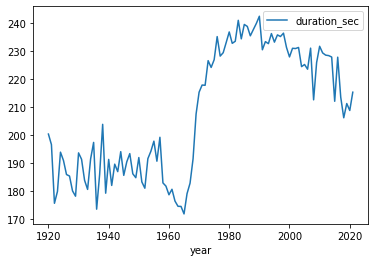

In [15]:
(df.groupby('year').mean()[['duration_sec']]).plot()

The time series graph above shows how duration of the songs in the data change over time. There is a clear jump between 60's and 80's.

###<font color="#1DB954">Visualizations of Aggregated Forms Based on Features</font>

In [16]:
df_year = df_year.dropna(how="any")
df_year

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2020,0.202303,0.605285,218977.482767,0.674247,0.249008,0.234415,-8.077563,0.100629,124.058308,0.468030,24.064741,0,1
101,2021,0.340253,0.652488,222760.028261,0.578896,0.356765,0.162309,-9.547752,0.108559,120.525875,0.451908,7.750543,7,1


In [17]:
genreNames = ["Rock","Pop", "Metal","Jazz","Blues","Electronic", "Indie", "Rap", "Hip-Hop", "Classic", "Reggae", "Funk", "Punk", 
              "Folk", "Soul", "R&B", "Lo-Fi"]
len(genreNames)

17

In [18]:
df_genres["duration_sec"] = df_genres["duration_ms"].apply(msToSec)
Q1 = df_genres['duration_sec'].quantile(0.25)
Q3 = df_genres['duration_sec'].quantile(0.75)
IQR = Q3 - Q1
df_genres = df_genres.query('(@Q1 - 1.5 * @IQR) <= duration_sec <= (@Q3 + 1.5 * @IQR)')

Here we will group sub genres under primary well-known genres like pop, metal etc. Then we will sort them using mean values to see how genres differ from each other

In [19]:
listOfGenres = []
df_rock = df_genres[df_genres['genres'].str.lower().str.contains("rock")]
listOfGenres.append(df_rock)
df_pop = df_genres[df_genres['genres'].str.lower().str.contains("pop")]
listOfGenres.append(df_pop)
df_metal = df_genres[df_genres['genres'].str.lower().str.contains("metal")]
listOfGenres.append(df_metal)
df_jazz = df_genres[df_genres['genres'].str.lower().str.contains("jazz")]
listOfGenres.append(df_jazz)
df_blues = df_genres[df_genres['genres'].str.lower().str.contains("blues")]
listOfGenres.append(df_blues)
df_electronic = df_genres[df_genres['genres'].str.lower().str.contains("electronic")]
listOfGenres.append(df_electronic)
df_indie = df_genres[df_genres['genres'].str.lower().str.contains("indie")]
listOfGenres.append(df_indie)
df_rap = df_genres[df_genres['genres'].str.lower().str.contains("rap")]
listOfGenres.append(df_rap)       
df_hip_hop = df_genres[df_genres['genres'].str.lower().str.contains("hip hop")]
listOfGenres.append(df_hip_hop)  
df_classic = df_genres[df_genres['genres'].str.lower().str.contains("classic")] 
listOfGenres.append(df_classic)
df_reggae = df_genres[df_genres['genres'].str.lower().str.contains("reggae")] 
listOfGenres.append(df_reggae)
df_funk = df_genres[df_genres['genres'].str.lower().str.contains("funk")] 
listOfGenres.append(df_funk)
df_punk = df_genres[df_genres['genres'].str.lower().str.contains("punk")] 
listOfGenres.append(df_punk)
df_folk = df_genres[df_genres['genres'].str.lower().str.contains("folk")] 
listOfGenres.append(df_folk)
df_soul = df_genres[df_genres['genres'].str.lower().str.contains("soul")] 
listOfGenres.append(df_soul)
df_rnb = df_genres[df_genres['genres'].str.lower().str.contains("r&b")] 
listOfGenres.append(df_rnb)
df_lo_fi = df_genres[df_genres['genres'].str.lower().str.contains("lo-fi")] 
listOfGenres.append(df_lo_fi)
len(listOfGenres)

17

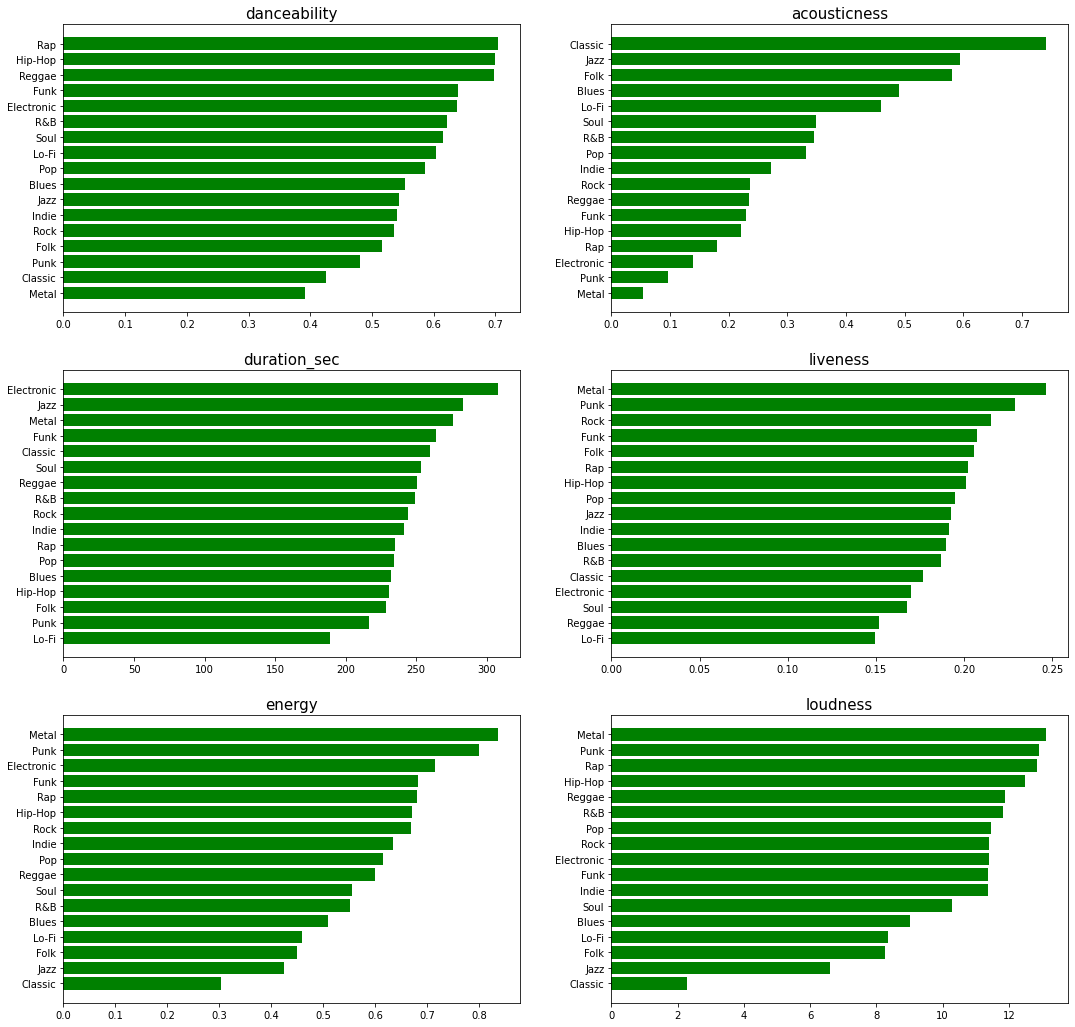

In [21]:
values = []
curr_data = []
sortdata = {}
features1 = ["danceability","acousticness","duration_sec","liveness","energy","loudness"]
r=3
c=2

fig, ax = plt.subplots(3,2, figsize=(18,18))
y_pos = np.arange(len(listOfGenres))
for i in range(6):
    for ind,data in enumerate(listOfGenres):
        curr_mean = data[features1[i]].mean()
        if(features1[i] == "loudness"):
            curr_mean += 20
        values.append(curr_mean)
        sortdata[curr_mean] = genreNames[ind]

    values.sort()
    for mean in values:
        curr_data.append(sortdata[mean])
    ax[i // c][i % c].barh(curr_data, values,align='center', color="green")
    ax[i // c][i % c].set_label(features1[i])
    ax[i // c][i % c].set_title(features1[i], fontsize=15)
    values = []
    curr_data = []


plt.show()

Here we can see features of different genres vary a lot. For example, metal has the highest loudness and energy score while having the lowest danceability score. This gives us an idea why different genres sound different and what genres are relatively similar or very dissimilar. For example, metal and punk are often close to each other in rankings while metal and Lo-Fi are far away.

In [22]:
listOfMeans = []
listOfMeans.append(df_rock["popularity"].mean())
listOfMeans.append(df_pop["popularity"].mean())
listOfMeans.append(df_metal["popularity"].mean())
listOfMeans.append(df_jazz["popularity"].mean())
listOfMeans.append(df_blues["popularity"].mean())
listOfMeans.append(df_electronic["popularity"].mean())
listOfMeans.append(df_indie["popularity"].mean())
listOfMeans.append(df_rap["popularity"].mean())
listOfMeans.append(df_hip_hop["popularity"].mean())
listOfMeans.append(df_classic["popularity"].mean())
listOfMeans.append(df_reggae["popularity"].mean())
listOfMeans.append(df_funk["popularity"].mean())
listOfMeans.append(df_punk["popularity"].mean())
listOfMeans.append(df_folk["popularity"].mean())
listOfMeans.append(df_soul["popularity"].mean())
listOfMeans.append(df_rnb["popularity"].mean())
listOfMeans.append(df_lo_fi["popularity"].mean())

len(listOfMeans)

17

We will use the list in the upper cell for plotting the comparison of the genres' popularities.

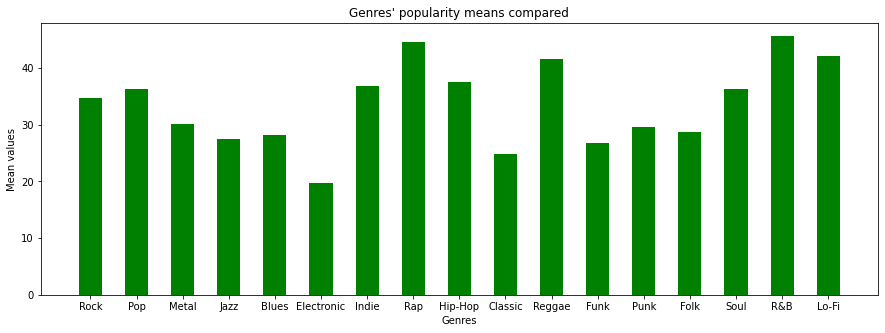

In [23]:
x = genreNames
y = listOfMeans

plt.figure(figsize=(15,5))
plt.bar(x, y, color='green', width=0.5)
plt.xlabel("Genres")
plt.ylabel("Mean values")
plt.title("Genres' popularity means compared")

plt.show()

We have compared the mean values of the chosen genres (since there are a lot of genres, we chose some genres among all of them) here, by this comparison, wehave obtained the most popular genre in average.


###<font color="#1DB954">Analysis of the Most Popular Artists and Songs</font>


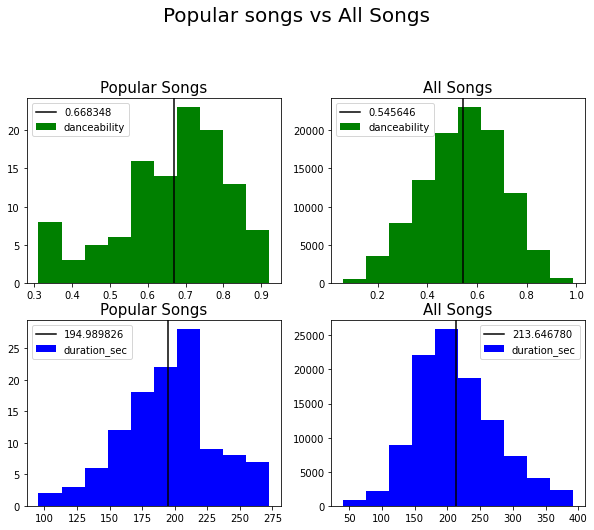

In [24]:
maxpop = df["popularity"].max()

popdf = df[df["popularity"] >= 85 ] #popular sarkı bilgileri

popartists = popdf[["artists", "name"]]

fig, axes = plt.subplots(2,2,figsize=(10, 7.5),squeeze=False)

#popdf["danceability"].plot.hist(ax=axes[0][0])
#df["danceability"].plot.hist(ax=axes[0][1])

#popgenres = [df_genres[df_genres["artists"] == popartists["artists"]]]

#popartists
fig.suptitle("Popular songs vs All Songs", y=1.05, fontsize=20)

axes[0][0].hist(popdf["danceability"], color='green', label = "danceability")
axes[0][0].set_title("Popular Songs", fontsize=15)
axes[0][0].axvline(popdf["danceability"].mean(), 0, 1, c="black",label=f'{np.mean(popdf["danceability"].mean()):1f}')
axes[0][0].legend()

axes[0][1].hist(df["danceability"], color='green', label = "danceability")
axes[0][1].set_title("All Songs", fontsize=15)
axes[0][1].axvline(df["danceability"].mean(), 0, 1, c="black",label=f'{np.mean(df["danceability"].mean()):1f}')
axes[0][1].legend()

axes[1][0].hist(popdf["duration_sec"], color='blue', label = "duration_sec")
axes[1][0].set_title("Popular Songs", fontsize=15)
axes[1][0].axvline(popdf["duration_sec"].mean(), 0, 1, c="black",label=f'{np.mean(popdf["duration_sec"].mean()):1f}')
axes[1][0].legend()

axes[1][1].hist(df["duration_sec"], color='blue', label = "duration_sec")
axes[1][1].set_title("All Songs", fontsize=15)
axes[1][1].axvline(df["duration_sec"].mean(), 0, 1, c="black",label=f'{np.mean(df["duration_sec"].mean()):1f}')
axes[1][1].legend()

plt.show()

At the above chart we are comparing some features of the popular songs and all the dataset. When we compare the danceabilities of the songs we see that popular songs’ danceability mean is higher. Also the mean of duration in seconds for the popular songs are smaller than all the mean in the dataset.

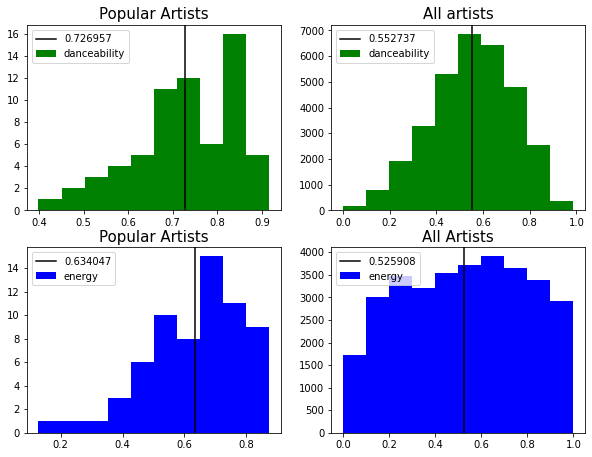

In [25]:
maxpop2 = df_artists["popularity"].max()
pop_artist_df = df_artists[df_artists["popularity"] >=80]



popartists = pop_artist_df[["artists"]]

fig.suptitle("Popular artists vs All artists", y=1.05, fontsize=20)

fig, axes = plt.subplots(2,2,figsize=(10, 7.5),squeeze=False)

axes[0][0].hist(pop_artist_df["danceability"], color='green', label = "danceability")
axes[0][0].set_title("Popular Artists", fontsize=15)
axes[0][0].axvline(pop_artist_df["danceability"].mean(), 0, 1, c="black",label=f'{np.mean(pop_artist_df["danceability"].mean()):1f}')
axes[0][0].legend()

axes[0][1].hist(df_artists["danceability"], color='green', label = "danceability")
axes[0][1].set_title("All artists", fontsize=15)
axes[0][1].axvline(df_artists["danceability"].mean(), 0, 1, c="black",label=f'{np.mean(df_artists["danceability"].mean()):1f}')
axes[0][1].legend()

axes[1][0].hist(pop_artist_df["energy"], color='blue', label = "energy")
axes[1][0].set_title("Popular Artists", fontsize=15)
axes[1][0].axvline(pop_artist_df["energy"].mean(), 0, 1, c="black",label=f'{np.mean(pop_artist_df["energy"].mean()):1f}')
axes[1][0].legend()

axes[1][1].hist(df_artists["energy"], color='blue', label = "energy")
axes[1][1].set_title("All Artists", fontsize=15)
axes[1][1].axvline(df_artists["energy"].mean(), 0, 1, c="black",label=f'{np.mean(df_artists["energy"].mean()):1f}')
axes[1][1].legend()

When we look and compare the popular artists and all artists we again see that the mean of the dancibility is much higher for the popular artists. In addition the energy mean is also higher for the popular artists.

In [26]:
artists_count = df_artists.sort_values(by=['popularity'],ascending=False)
artists_count[['artists','popularity']].head(5)

,artists,popularity
4212,CJ,94.0
3767,Boza,92.0
13963,Joel Corry,91.0
14688,Juhn,91.0
23922,Ritt Momney,89.0


In the cell above, we sorted the popularity values of the data in df_artists dataframe and took the top 5 artists that have the highest popularity values. 

In [27]:
popular_df2 = df.sort_values(by=["popularity"], ascending = False)

popular_df2[['name','year','artists', 'popularity']].head(5)

,name,year,artists,popularity
20062,drivers license,2021,['Olivia Rodrigo'],100
19862,Mood (feat. iann dior),2020,"['24kGoldn', 'iann dior']",96
19866,positions,2020,['Ariana Grande'],96
19886,DÁKITI,2020,"['Bad Bunny', 'Jhay Cortez']",95
19868,34+35,2020,['Ariana Grande'],94


We sorted the data in data.csv according to their popularity values and took the top 5 songs that have the highest popularity values. 

In [20]:
df_artists_sorted = df_artists.sort_values(by=["popularity"], ascending=False)
popular_df2 = df.sort_values(by=["popularity"], ascending = False)

top_5_artists = df_artists_sorted.head(5)
top_5_songs = popular_df2.head(5)

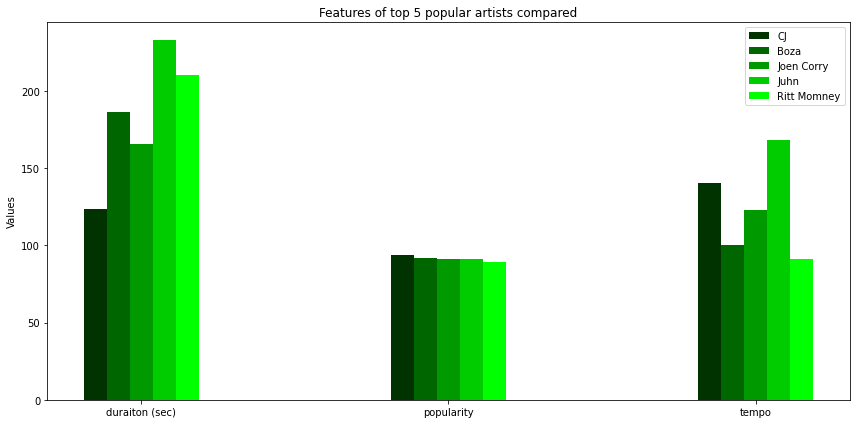

In [29]:
labels = ['duraiton (sec)','popularity','tempo']

pop1=[top_5_artists.iloc[0]["duration_ms"]/1000,top_5_artists.iloc[0]["popularity"],top_5_artists.iloc[0]["tempo"]]
pop2=[top_5_artists.iloc[1]["duration_ms"]/1000,top_5_artists.iloc[1]["popularity"],top_5_artists.iloc[1]["tempo"]]
pop3=[top_5_artists.iloc[2]["duration_ms"]/1000,top_5_artists.iloc[2]["popularity"],top_5_artists.iloc[2]["tempo"]]
pop4=[top_5_artists.iloc[3]["duration_ms"]/1000,top_5_artists.iloc[3]["popularity"],top_5_artists.iloc[3]["tempo"]]
pop5=[top_5_artists.iloc[4]["duration_ms"]/1000,top_5_artists.iloc[4]["popularity"],top_5_artists.iloc[4]["tempo"]]

x = np.arange(len(labels))  # the label locations
width = 0.075  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))
bar1 = ax.bar(x - 2*width, pop1, width, label='CJ', color="#003300")
bar2 = ax.bar(x - width,   pop2, width, label='Boza', color="#006600")
bar3 = ax.bar(x,             pop3, width, label='Joen Corry', color="#009900")
bar4 = ax.bar(x + width,   pop4, width, label='Juhn', color="#00CC00")
bar5 = ax.bar(x + 2*width, pop5, width, label='Ritt Momney', color="#00FF00")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title('Features of top 5 popular artists compared')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

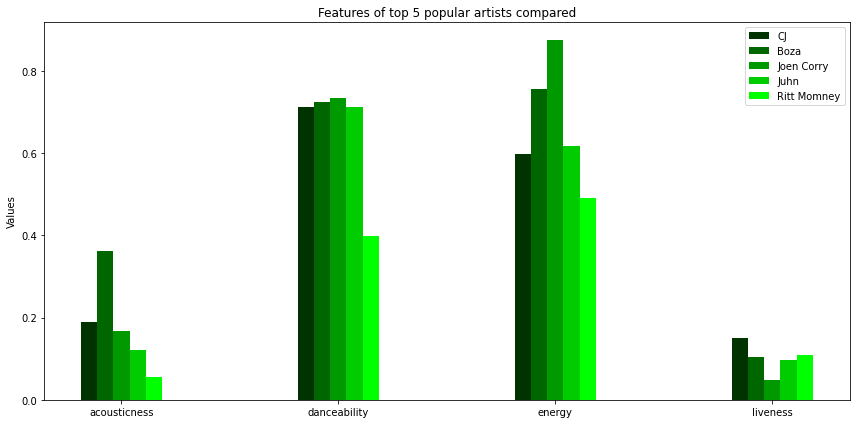

In [30]:
labels = ["acousticness","danceability","energy","liveness"]

pop1=[top_5_artists.iloc[0]["acousticness"],top_5_artists.iloc[0]["danceability"],top_5_artists.iloc[0]["energy"],
      top_5_artists.iloc[0]["liveness"]]
pop2=[top_5_artists.iloc[1]["acousticness"],top_5_artists.iloc[1]["danceability"],top_5_artists.iloc[1]["energy"],
      top_5_artists.iloc[1]["liveness"]]
pop3=[top_5_artists.iloc[2]["acousticness"],top_5_artists.iloc[2]["danceability"],top_5_artists.iloc[2]["energy"],
      top_5_artists.iloc[2]["liveness"]]
pop4=[top_5_artists.iloc[3]["acousticness"],top_5_artists.iloc[3]["danceability"],top_5_artists.iloc[3]["energy"],
      top_5_artists.iloc[3]["liveness"]]
pop5=[top_5_artists.iloc[4]["acousticness"],top_5_artists.iloc[4]["danceability"],top_5_artists.iloc[4]["energy"],
      top_5_artists.iloc[4]["liveness"]]
      
x = np.arange(len(labels))  # the label locations
width = 0.075  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))
bar1 = ax.bar(x - 2*width, pop1, width, label='CJ', color="#003300")
bar2 = ax.bar(x - width,   pop2, width, label='Boza', color="#006600")
bar3 = ax.bar(x,             pop3, width, label='Joen Corry', color="#009900")
bar4 = ax.bar(x + width,   pop4, width, label='Juhn', color="#00CC00")
bar5 = ax.bar(x + 2*width, pop5, width, label='Ritt Momney', color="#00FF00")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title('Features of top 5 popular artists compared')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

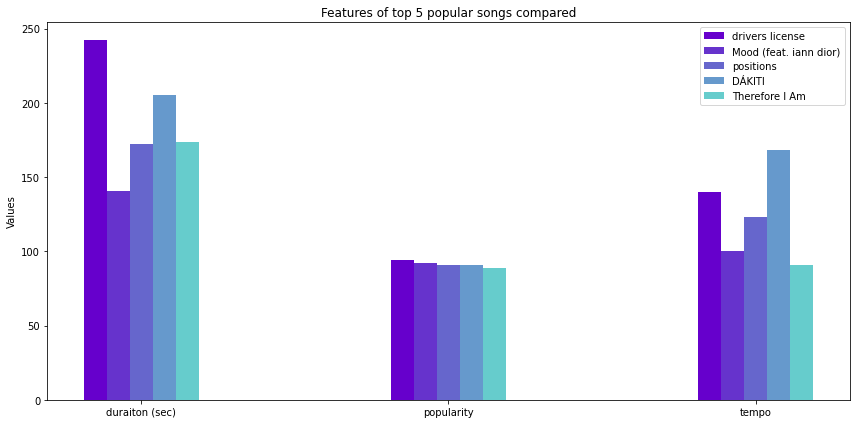

In [31]:
labels = ['duraiton (sec)','popularity','tempo']

pop1=[top_5_songs.iloc[0]["duration_ms"]/1000,top_5_artists.iloc[0]["popularity"],top_5_artists.iloc[0]["tempo"]]
pop2=[top_5_songs.iloc[1]["duration_ms"]/1000,top_5_artists.iloc[1]["popularity"],top_5_artists.iloc[1]["tempo"]]
pop3=[top_5_songs.iloc[2]["duration_ms"]/1000,top_5_artists.iloc[2]["popularity"],top_5_artists.iloc[2]["tempo"]]
pop4=[top_5_songs.iloc[3]["duration_ms"]/1000,top_5_artists.iloc[3]["popularity"],top_5_artists.iloc[3]["tempo"]]
pop5=[top_5_songs.iloc[4]["duration_ms"]/1000,top_5_artists.iloc[4]["popularity"],top_5_artists.iloc[4]["tempo"]]

x = np.arange(len(labels))  # the label locations
width = 0.075  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))
bar1 = ax.bar(x - 2*width, pop1, width, label='drivers license', color="#6600CC")
bar2 = ax.bar(x - width,   pop2, width, label='Mood (feat. iann dior)', color="#6633CC")
bar3 = ax.bar(x,             pop3, width, label='positions', color="#6666CC")
bar4 = ax.bar(x + width,   pop4, width, label='DÁKITI', color="#6699CC")
bar5 = ax.bar(x + 2*width, pop5, width, label='Therefore I Am', color="#66CCCC")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title('Features of top 5 popular songs compared')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

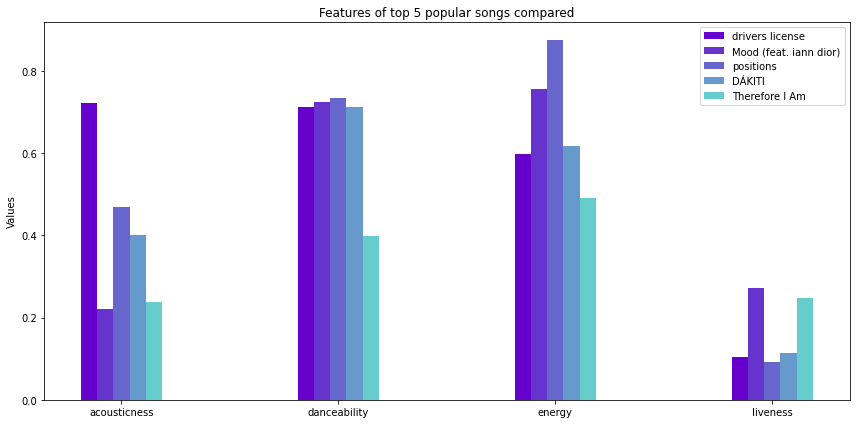

In [32]:
#5. en popüler şarkı colab ve burada farklı çıkıyor aynı popülerlikte birden fazla şarkı var
labels = ["acousticness","danceability","energy","liveness"]

pop1=[top_5_songs.iloc[0]["acousticness"],top_5_artists.iloc[0]["danceability"],top_5_artists.iloc[0]["energy"],
      top_5_songs.iloc[0]["liveness"]]
pop2=[top_5_songs.iloc[1]["acousticness"],top_5_artists.iloc[1]["danceability"],top_5_artists.iloc[1]["energy"],
      top_5_songs.iloc[1]["liveness"]]
pop3=[top_5_songs.iloc[2]["acousticness"],top_5_artists.iloc[2]["danceability"],top_5_artists.iloc[2]["energy"],
      top_5_songs.iloc[2]["liveness"]]
pop4=[top_5_songs.iloc[3]["acousticness"],top_5_artists.iloc[3]["danceability"],top_5_artists.iloc[3]["energy"],
      top_5_songs.iloc[3]["liveness"]]
pop5=[top_5_songs.iloc[4]["acousticness"],top_5_artists.iloc[4]["danceability"],top_5_artists.iloc[4]["energy"],
      top_5_songs.iloc[4]["liveness"]]
      
x = np.arange(len(labels))  # the label locations
width = 0.075  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))
bar1 = ax.bar(x - 2*width, pop1, width, label='drivers license', color="#6600CC")
bar2 = ax.bar(x - width,   pop2, width, label='Mood (feat. iann dior)', color="#6633CC")
bar3 = ax.bar(x,             pop3, width, label='positions', color="#6666CC")
bar4 = ax.bar(x + width,   pop4, width, label='DÁKITI', color="#6699CC")
bar5 = ax.bar(x + 2*width, pop5, width, label='Therefore I Am', color="#66CCCC")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title('Features of top 5 popular songs compared')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

<font color="#1DB954">How Songs of Different Genres Change Over Time</font>

In [21]:
def FixName(s):
    theLen = len(s)

    s = s[2:theLen-2:1]

    return s

df = pd.read_csv("https://dsc.cloud/b45dcb/data/data.csv")
newdf = df


newdf["artists"] = newdf["artists"].apply(FixName)
df_merged_latest = pd.merge(newdf, df_genresBig, on="artists")

We defined a function fixName with a parameter of string that fixes the string element.

The function is applied to the new temp (newdf) DataFrame.

We merged the temp (newdf) data frame with the DataFrame and constructed a latest DataFrame which will be used to investigate genres overtime.

In [22]:
#NEW CODE
def addPeriod (year):
     if(str(year)[0] == "2"):
          period = "20"+ str(year)[-2] + "0s"
     else:
         period = str(year)[-2] + "0s"
    
     return period


df_merged_latest['period'] = df_merged_latest['year'].apply(addPeriod)

In [158]:
df_merged_latest.head()

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,...,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,key_y,mode_y,count,genres,period
0,0.991,Mamie Smith,0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,...,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,"['harlem renaissance', 'traditional blues']",20s
1,0.993,Mamie Smith,0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.519,...,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,"['harlem renaissance', 'traditional blues']",20s
2,0.992,Mamie Smith,0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.176,...,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,"['harlem renaissance', 'traditional blues']",20s
3,0.992,Mamie Smith,0.574,189800,0.1380,0,4HYmmG8uHL2hP4zSFWavKF,0.000492,3,0.233,...,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,"['harlem renaissance', 'traditional blues']",20s
4,0.977,Mamie Smith,0.594,167440,0.2400,0,5Dh1E4kXDwXwVfChsExG3G,0.000000,0,0.503,...,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,"['harlem renaissance', 'traditional blues']",20s


In [23]:
df_metal_time = df_merged_latest[df_merged_latest['genres'].str.lower().str.contains("metal")]
df_country_time = df_merged_latest[df_merged_latest['genres'].str.lower().str.contains("country")]
df_pop_time = df_merged_latest[df_merged_latest['genres'].str.lower().str.contains("pop")]
df_rock_time = df_merged_latest[df_merged_latest['genres'].str.lower().str.contains("rock")]
df_jazz_time = df_merged_latest[df_merged_latest['genres'].str.lower().str.contains("jazz")]
df_blues_time = df_merged_latest[df_merged_latest['genres'].str.lower().str.contains("blues")]
df_lo_fi_time = df_merged_latest[df_merged_latest['genres'].str.lower().str.contains("lo-fi")]
df_soul_time = df_merged_latest[df_merged_latest['genres'].str.lower().str.contains("soul")]
df_hip_hop_time = df_merged_latest[df_merged_latest['genres'].str.lower().str.contains("hip hop")]
df_reggae_time = df_merged_latest[df_merged_latest['genres'].str.lower().str.contains("reggae")]
df_indie_time = df_merged_latest[df_merged_latest['genres'].str.lower().str.contains("indie")]
df_electronic_time = df_merged_latest[df_merged_latest['genres'].str.lower().str.contains("electronic")]
df_rap_time = df_merged_latest[df_merged_latest['genres'].str.lower().str.contains("rap")]
df_rnb_time = df_merged_latest[df_merged_latest['genres'].str.lower().str.contains("r&b")]
df_punk_time = df_merged_latest[df_merged_latest['genres'].str.lower().str.contains("punk")]
df_funk_time = df_merged_latest[df_merged_latest['genres'].str.lower().str.contains("funk")]
df_classic_time = df_merged_latest[df_merged_latest['genres'].str.lower().str.contains("classic")]
df_folk_time = df_merged_latest[df_merged_latest['genres'].str.lower().str.contains("folk")]


listOfTime = []

genreNames = ["Rock","Pop", "Metal","Jazz","Blues","Electronic", "Indie", "Rap", "Hip-Hop", "Classic", "Reggae", "Funk", "Punk", 
              "Folk", "Soul", "R&B", "Lo-Fi"]
listOfTime.append(df_rock_time)
listOfTime.append(df_pop_time)
listOfTime.append(df_metal_time)
listOfTime.append(df_jazz_time)
listOfTime.append(df_blues_time)
listOfTime.append(df_electronic_time)
listOfTime.append(df_indie_time)
listOfTime.append(df_rap_time)
listOfTime.append(df_hip_hop_time)
listOfTime.append(df_classic_time)
listOfTime.append(df_reggae_time)
listOfTime.append(df_funk_time)
listOfTime.append(df_punk_time)
listOfTime.append(df_folk_time)
listOfTime.append(df_soul_time)
listOfTime.append(df_rnb_time)
listOfTime.append(df_lo_fi_time)

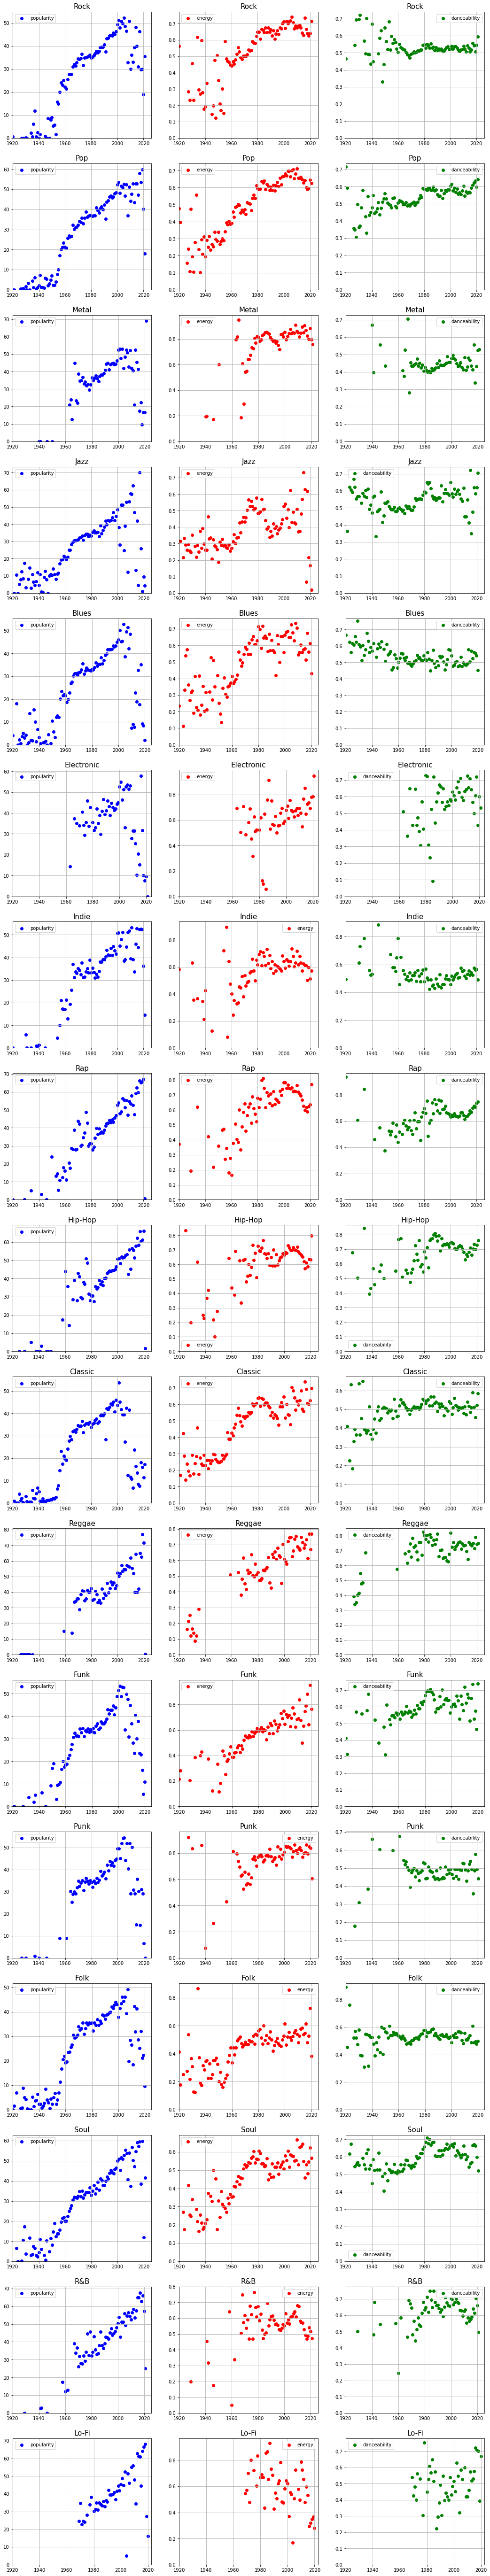

In [36]:
listofYears = []
listofMeans = []

features = ["popularity_x","energy_x","danceability_x"]
#features = ["danceability_x","acousticness_x","energy_x"]
color = ["blue", "red", "green"]
fig, ax = plt.subplots(17,3, figsize=(18,100))
for ind,data in enumerate(listOfTime):
    for i in range((len(features))):
        for j in range(1920,2022):
            newdff = listOfTime[ind][listOfTime[ind]["year"] == j] 
            listofYears.append(j) 
            listofMeans.append(newdff[features[i]].mean())
        ax[ind][i].scatter(listofYears, listofMeans, color=color[i], label = features[i][:-2])
        ax[ind][i].legend()

        ax[ind][i].set_title(genreNames[ind], fontsize=15) 
        ax[ind][i].set_ylim(0)
        ax[ind][i].set_xlim(1920)
        listofMeans = []
        listofYears = []
        ax[ind][i].grid(True)

The above charts show all the genres and the changes in some of their features which are popularity, energy, danceability.

<font color="#1DB954">**Rock:**</font> When we look at the scatter plot we see that the popularity of rock has increased for a long time but after 2000 it started falling. The energy however is seen stable for the last few years. The danceability also seems very stable throughout the years.

<font color="#1DB954">**Pop:**</font>  When it’s looked at the popularity plot, it can be seen that pop has a weak trend of increasing towards the 1940s. However, there is a constant decrease in the decade after the 40s. After the 1950's we can see a logarithmic boom in popularity taking place until the 2000s. Similar to the popularity of Rock, it flattered the curve during the noughties and started falling after. However, at the same time interval, it can be seen that energy has started to increase over time until the 1980s where it settled at its stable levels. Additionally, we can say that the danceability of pop increased slowly until the 1980s where it found its stable point in the 1980s, a similar time interval as the energy. 

<font color="#1DB954">**Metal:**</font> As seen metal genre can be seen as a newer genre when compared to most of the other genres. From the years it has been found we see a gradual increase in its popularity. However, around the 2010s it shows that the popularity decreased but in 2021 there is again a big leap forward. The energy and danceability values do not show a big change over time.

<font color="#1DB954">**Jazz:**</font> The genre’s popularity increased for a long period of time but after the 2000s the popularity started falling. The energy is also very similar to what we see in popularity. The danceability doesn’t show a very big difference but it can be seen that after the 2000s there are big ups and downs.

<font color="#1DB954">**Blues:**</font> The popularity chart of blues is also very similar to the chart of jazz. It increases for a long period of time and after the 2000s it starts falling drastically. The energy chart shows that it increased until the 1980s and after that did not fall but spanned the same area of values. The danceability mostly stayed the same.

<font color="#1DB954">**Electronic:**</font> Like Metal Electronic is another genre that was found later. From the 1980s to the late 2000s we saw a regular increase in its popularity. However, after that, we see a big drop. Energy is also seen as an increasing value over time. The danceability of electronic music did not have a regular increase but had more mixed values.

<font color="#1DB954">**Indie:**</font> Indie music shows an increase in popularity from the 1960s to the 2000s. After the 2000s it seems like the popularity mostly settled at some point. However, in the last 2 years, there is a big drop in popularity. The energy values were very mixed until the 1960s but after that, the values are also settled. Just like the energy values, danceability is also very mixed before the 1960s and after that, it also settles in between some values.

<font color="#1DB954">**Rap:**</font> The rap genre is rapidly growing in popularity to this day and now it is at its all-time high (however there seems to be an outlier or missing data case in 2021). Also, we can see that around 2020’s songs started to get less energetic and more danceable. 

<font color="#1DB954">**Hip-Hop:**</font> Hip-Hop is gaining popularity since the 1960s and today it is at its all-time high (however there seems to be an outlier or missing data case in 2021). Energy values peaked around the 2010s and after they started to drop. It was most danceable around the 1980s and today we are seeing a rise in danceability and it is getting closer to 1980’s means. 


<font color="#1DB954">**Classic**</font>: When it comes to classic music, we can see that it’s been fairly stable until the mid-1950’s whereafter it increased drastically till the late 1960s. After that decade we can see an increasing trend but it’s not even close to its last great rise period. In the 2000s it hit its peak point but started decreasing in huge amounts until now 2021. When it comes to energy, however, we can see a similar increasing trend, with the exemption of the stable post-war period of the WW2, until the 1980s where it peaked it’s the local highest point but however it started to fall with a decreasing speed however we can say that the energy started to increase after mid-1990’s just like every genre of that list where it peaked its global maximum in late 2010s. In addition, when it’s looked at danceability we can see that it has been mostly stable.

<font color="#1DB954">**Reggae**</font> Reggae started to gain popularity around the 1970’s also around the same time its energy values started to rise as well. We don't see a similar change in danceability values. 

<font color="#1DB954">**Funk:**</font> Just like classical music, the popularity of funk increases exponentially until the 1970s where it landed on a stable level that will last for almost 1 decade. Beginning with the 1980’s we can see an exponential growth trend until the year 2000 which is the peak point of the genre’s popularity. Despite the huge trend we see until that year, the huge decrease started where the popularity has decreased similar to the levels of the 1930s’ until the last year, 2021. Additionally, we can see a constant energy increase. Lastly, the danceability of the funk has been stable throughout the years.


<font color="#1DB954">**Punk**</font> The punk genre started to gain popularity around the 1960s and saw its peak in the 2000s after which it rapidly declined in terms of popularity. We can see that its energy/danceability values went up around the same time that it started to gain popularity.

<font color="#1DB954">**Folk:**</font> Folk music gained a lot of momentum and started to grow rapidly around the 1950s until the 2000s when its popularity rapidly declined. We can see the genre didn't evolve at all in terms of danceability values.

<font color="#1DB954">**Soul:**</font> Soul is another genre that saw a constant growth in popularity until the 2000s and after that had some major dips in popularity. Energy/danceability went up until the 1980s and saw a little dip. Also, it is interesting to note that their change is similar to change in the R&B genre. 

<font color="#1DB954">**R&B:**</font> The popularity of R&B has been reading till this day however we can see some drops near 2020 but this doesn't mean much without future values. Also, energy/danceability values seem much higher than past after the 1960s and it is steady with some lows and highs.

<font color="#1DB954">**Lo-Fi:**</font> Here we can see lo-fi is a relatively new genre and it started around the 1960-1980s.Generally, its popularity slowly grew to this day. We can see that there is no uniform movement in energy/danceability values of the genre and it often changes randomly.

### <font color="#1DB954">Comparison of features of sub-genres for selected parent genres over time periods</font>

In [24]:
import ast

rockgenres = [x for x in df_indie_time['genres']] 
subrockgenres =  []


for i in rockgenres:
    subgenre = ast.literal_eval(i)
    for y in range(len(subgenre)):
        subrockgenres.append(subgenre[y])


from collections import Counter
subgenrecount = Counter(subrockgenres)
print(subgenrecount)

Counter({'alternative rock': 1574, 'indie rock': 1563, 'rock': 1281, 'modern rock': 1249, 'indie pop': 1190, 'indie folk': 854, 'stomp and holler': 692, 'pop rock': 649, 'art rock': 573, 'permanent wave': 554, 'anti-folk': 446, 'new americana': 445, 'freak folk': 425, 'melancholia': 424, 'dance rock': 392, 'roots rock': 367, 'lo-fi': 359, 'indie poptimism': 354, 'art pop': 350, 'pop': 344, 'modern alternative rock': 337, 'dance-punk': 322, 'electropop': 309, 'dream pop': 306, 'folk': 296, 'new wave': 287, 'indietronica': 282, 'singer-songwriter': 271, 'alternative country': 266, 'traditional folk': 250, 'canadian indie': 238, 'neo mellow': 233, 'alternative dance': 225, 'post-punk': 223, 'scottish indie': 215, 'folk rock': 214, 'indiecoustica': 213, 'classic rock': 213, 'country rock': 212, 'acoustic pop': 208, 'athens indie': 204, 'noise pop': 195, 'punk': 192, 'shoegaze': 183, 'new rave': 177, 'indie cafe pop': 163, 'indie garage rock': 147, 'lilith': 147, 'power pop': 145, 'alternat

We used the code in the cell above to choose which sub-genres of the chosen parent genres to use (since there are many sub-genres, we couldn't use them all at the same time and the graphs would be unreadable).

We took the first two most reccuring sub-genres to compare with the aprent genres.

As an example, for indie, we chose indie rock and indie pop which have reccurances as 1563 and 1190 respectively.

In [25]:
df_metal_sub_alternative = df_metal_time[df_metal_time['genres'].str.lower().str.contains("alternative metal")]
df_metal_sub_nu = df_metal_time[df_metal_time['genres'].str.lower().str.contains("nu metal")]


df_country_sub_rock = df_country_time[df_country_time['genres'].str.lower().str.contains("country rock")]
df_country_sub_road = df_country_time[df_country_time['genres'].str.lower().str.contains("country road")]


df_pop_sub_brill_building = df_pop_time[df_pop_time['genres'].str.lower().str.contains("brill building pop")]
df_pop_sub_dance = df_pop_time[df_pop_time['genres'].str.lower().str.contains("dance pop")]


df_rock_sub_album = df_rock_time[df_rock_time['genres'].str.lower().str.contains("album rock")]
df_rock_sub_soft = df_rock_time[df_rock_time['genres'].str.lower().str.contains("soft rock")]


df_hip_hop_sub_hardcore = df_hip_hop_time[df_hip_hop_time['genres'].str.lower().str.contains("hardcore hip hop")]
df_hip_hop_sub_east_coast = df_hip_hop_time[df_hip_hop_time['genres'].str.lower().str.contains("east coast hip hop")]


df_indie_sub_rock = df_indie_time[df_indie_time['genres'].str.lower().str.contains("indie rock")]
df_indie_sub_pop = df_indie_time[df_indie_time['genres'].str.lower().str.contains("indie pop")]


df_rap_sub_pop = df_rap_time[df_rap_time['genres'].str.lower().str.contains("pop rap")]
df_rap_sub_gangster = df_rap_time[df_rap_time['genres'].str.lower().str.contains("gangster rap")]


df_rnb_sub_alternative = df_rnb_time[df_rnb_time['genres'].str.lower().str.contains("alternative r&b")]
df_rnb_sub_pop = df_rnb_time[df_rnb_time['genres'].str.lower().str.contains("pop r&b")]

In the cell above, we have created new dataframes for chosen sub genres.

In [26]:
def genreYear(df,theList, feature):
    for i in range(1920,2022):
         
        newdff = df[df["year"] == i]  

        theList.append(newdff[feature].mean()) 

def appendYears(theList):
    for i in range(1920, 2022):
        theList.append(i)

The functions above are needed for the plottings in the cells belove.

In [27]:
listOfYears = []
appendYears(listOfYears)

We have 8 different plots for the 8 chosen parent genres. We also chose 2 features to show the change over time of parent genres and sub genres and those features are <font color="#1DB954">popularity</font> and <font color="#1DB954">danceability</font>. 
In every plot, we have 2 graphs: one showing danceability's change and the other showing popularity's change over time. 

(In the plots, there are some gaps because in some sub genres or parent genres, there might not be any data for that year)

We have placed the time series of the parent genre and the sub genres in the same plot to ease the comparison over time.

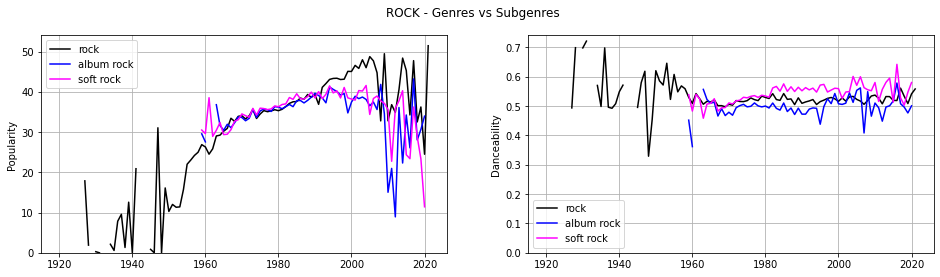

In [41]:
listOfPopulartiyMeansParent = []
popularityMeansSub1 = []
popularityMeansSub2 = []

genreYear(df_rock_time,listOfPopulartiyMeansParent, "popularity_y")
genreYear(df_rock_sub_album, popularityMeansSub1, "popularity_y")
genreYear(df_rock_sub_soft, popularityMeansSub2, "popularity_y")

fig, ax = plt.subplots(1,2, figsize=(16,4),squeeze = False)

fig.suptitle("ROCK - Genres vs Subgenres", fontsize=12)

ax[0][0].plot(listOfYears, listOfPopulartiyMeansParent, color='black', label='rock')
ax[0][0].plot(listOfYears, popularityMeansSub1, color='blue', label='album rock')
ax[0][0].plot(listOfYears, popularityMeansSub2, color='magenta', label='soft rock')
ax[0][0].set_ylim(0)
ax[0][0].grid(True)
ax[0][0].legend()
ax[0][0].set_ylabel("Popularity")
######################################
listOfDanceabilityMeansParent = []
danceabilityMeansSub1 = []
danceabilityMeansSub2 = []

genreYear(df_rock_time,listOfDanceabilityMeansParent, "danceability_y")
genreYear(df_rock_sub_album, danceabilityMeansSub1, "danceability_y")
genreYear(df_rock_sub_soft, danceabilityMeansSub2, "danceability_y")


ax[0][1].plot(listOfYears, listOfDanceabilityMeansParent, color='black', label='rock')
ax[0][1].plot(listOfYears, danceabilityMeansSub1, color='blue', label='album rock')
ax[0][1].plot(listOfYears, danceabilityMeansSub2, color='magenta', label='soft rock')
ax[0][1].set_ylim(0)
ax[0][1].grid(True)
ax[0][1].legend()
ax[0][1].set_ylabel("Danceability")
###############################

plt.show()

<font color="#1DB954">**Rock:**</font> Starting from the ’60s, the popularity of the parent genre rock has increased clearly. But the sub-genres album rock and soft rock have lost their popularity to rock starting from the 2000s. But danceability values of all 3 genres are very similar to each other so making a comment on them is not easy.

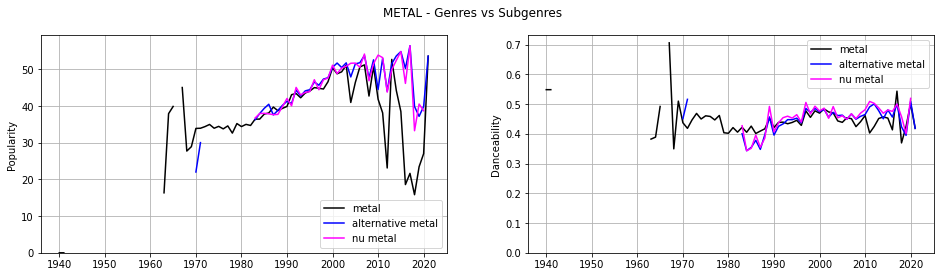

In [42]:
listOfPopulartiyMeansParent = []
popularityMeansSub1 = []
popularityMeansSub2 = []

genreYear(df_metal_time,listOfPopulartiyMeansParent, "popularity_y")
genreYear(df_metal_sub_alternative, popularityMeansSub1, "popularity_y")
genreYear(df_metal_sub_nu, popularityMeansSub2, "popularity_y")

fig, ax = plt.subplots(1,2, figsize=(16,4),squeeze = False)

fig.suptitle("METAL - Genres vs Subgenres", fontsize=12)

ax[0][0].plot(listOfYears, listOfPopulartiyMeansParent, color='black', label='metal')
ax[0][0].plot(listOfYears, popularityMeansSub1, color='blue', label='alternative metal')
ax[0][0].plot(listOfYears, popularityMeansSub2, color='magenta', label='nu metal')
ax[0][0].set_ylim(0)
ax[0][0].grid(True)
ax[0][0].legend()
ax[0][0].set_ylabel("Popularity")
######################################
listOfDanceabilityMeansParent = []
danceabilityMeansSub1 = []
danceabilityMeansSub2 = []

genreYear(df_metal_time,listOfDanceabilityMeansParent, "danceability_y")
genreYear(df_metal_sub_alternative, danceabilityMeansSub1, "danceability_y")
genreYear(df_metal_sub_nu, danceabilityMeansSub2, "danceability_y")


ax[0][1].plot(listOfYears, listOfDanceabilityMeansParent, color='black', label='metal')
ax[0][1].plot(listOfYears, danceabilityMeansSub1, color='blue', label='alternative metal')
ax[0][1].plot(listOfYears, danceabilityMeansSub2, color='magenta', label='nu metal')
ax[0][1].set_ylim(0)
ax[0][1].grid(True)
ax[0][1].legend()
ax[0][1].set_ylabel("Danceability")
###############################

plt.show()

<font color="#1DB954">**Metal:**</font> When we look at the popularity change of metal and its sub-genres we see that alternative and nu-metal are more popular most of the time since they were founded. The popularity of nu-metal and alternative metal was very similar most of the time. After the 2010s we see a huge decrease in the popularity of metal but these subgenres maintain their popularity. When we look at danceability which is more related to the music itself we see all of them are very similar over time.

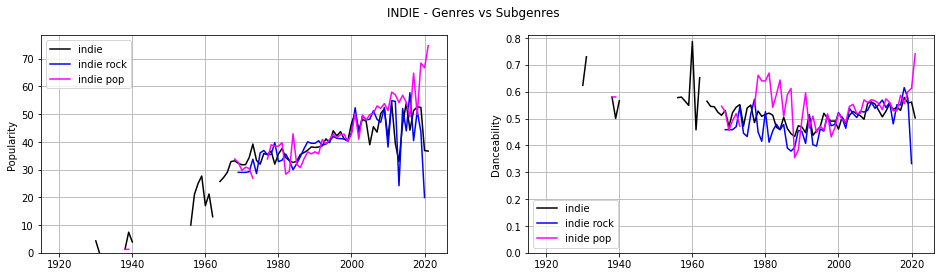

In [43]:
listOfPopulartiyMeansParent = []
popularityMeansSub1 = []
popularityMeansSub2 = []

genreYear(df_indie_time,listOfPopulartiyMeansParent, "popularity_y")
genreYear(df_indie_sub_rock, popularityMeansSub1, "popularity_y")
genreYear(df_indie_sub_pop, popularityMeansSub2, "popularity_y")

fig, ax = plt.subplots(1,2, figsize=(16,4),squeeze = False)

fig.suptitle("INDIE - Genres vs Subgenres", fontsize=12)

ax[0][0].plot(listOfYears, listOfPopulartiyMeansParent, color='black', label='indie')
ax[0][0].plot(listOfYears, popularityMeansSub1, color='blue', label='indie rock')
ax[0][0].plot(listOfYears, popularityMeansSub2, color='magenta', label='indie pop')
ax[0][0].set_ylim(0)
ax[0][0].grid(True)
ax[0][0].legend()
ax[0][0].set_ylabel("Popularity")
######################################
listOfDanceabilityMeansParent = []
danceabilityMeansSub1 = []
danceabilityMeansSub2 = []

genreYear(df_indie_time,listOfDanceabilityMeansParent, "danceability_y")
genreYear(df_indie_sub_rock, danceabilityMeansSub1, "danceability_y")
genreYear(df_indie_sub_pop, danceabilityMeansSub2, "danceability_y")


ax[0][1].plot(listOfYears, listOfDanceabilityMeansParent, color='black', label='indie')
ax[0][1].plot(listOfYears, danceabilityMeansSub1, color='blue', label='indie rock')
ax[0][1].plot(listOfYears, danceabilityMeansSub2, color='magenta', label='inide pop')
ax[0][1].set_ylim(0)
ax[0][1].grid(True)
ax[0][1].legend()
ax[0][1].set_ylabel("Danceability")
###############################

plt.show()

<font color="#1DB954">**Indie:**</font> Indie, indie rock, and indie-pop clearly gained popularity over time (except indie rock lost popularity after around 2010s. Lately, indie pop is the most popular one among these 3 genres. The danceability of the mentioned genres is very similar to each other but starting from 2020, indie pop has the highest danceability.

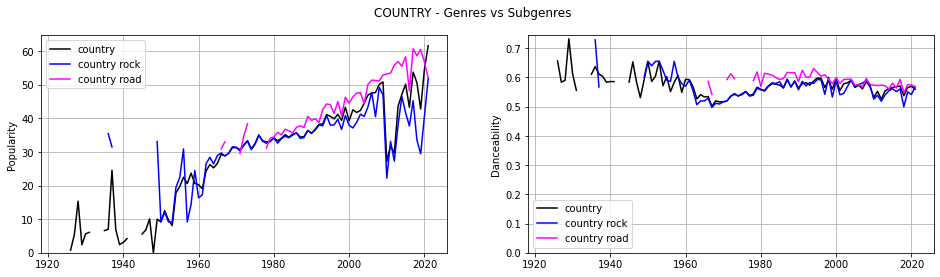

In [44]:
listOfPopulartiyMeansParent = []
popularityMeansSub1 = []
popularityMeansSub2 = []

genreYear(df_country_time,listOfPopulartiyMeansParent, "popularity_y")
genreYear(df_country_sub_rock, popularityMeansSub1, "popularity_y")
genreYear(df_country_sub_road, popularityMeansSub2, "popularity_y")

fig, ax = plt.subplots(1,2, figsize=(16,4),squeeze = False)

fig.suptitle("COUNTRY - Genres vs Subgenres", fontsize=12)

ax[0][0].plot(listOfYears, listOfPopulartiyMeansParent, color='black', label='country')
ax[0][0].plot(listOfYears, popularityMeansSub1, color='blue', label='country rock')
ax[0][0].plot(listOfYears, popularityMeansSub2, color='magenta', label='country road')
ax[0][0].set_ylim(0)
ax[0][0].grid(True)
ax[0][0].legend()
ax[0][0].set_ylabel("Popularity")
######################################
listOfDanceabilityMeansParent = []
danceabilityMeansSub1 = []
danceabilityMeansSub2 = []

genreYear(df_country_time,listOfDanceabilityMeansParent, "danceability_y")
genreYear(df_country_sub_rock, danceabilityMeansSub1, "danceability_y")
genreYear(df_country_sub_road, danceabilityMeansSub2, "danceability_y")


ax[0][1].plot(listOfYears, listOfDanceabilityMeansParent, color='black', label='country')
ax[0][1].plot(listOfYears, danceabilityMeansSub1, color='blue', label='country rock')
ax[0][1].plot(listOfYears, danceabilityMeansSub2, color='magenta', label='country road')
ax[0][1].set_ylim(0)
ax[0][1].grid(True)
ax[0][1].legend()
ax[0][1].set_ylabel("Danceability")
###############################

plt.show()

<font color="#1DB954">**Country:**</font> Country music gained popularity starting from the '60s (it is the same for country road and country-rock too). Around the 2010s, country rock lost popularity and the other 2 continued to gain more. The danceability of the 3 mentioned genres are very similar to each other, and over time they generally had a small decrease in danceability. The country road has the highest danceability starting from the ’60s until today.

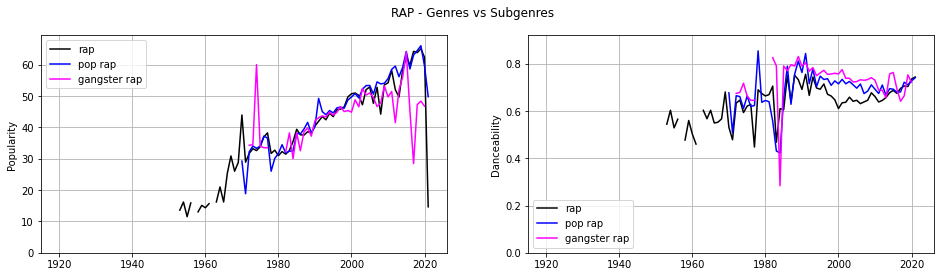

In [45]:
listOfPopulartiyMeansParent = []
popularityMeansSub1 = []
popularityMeansSub2 = []

genreYear(df_rap_time,listOfPopulartiyMeansParent, "popularity_y")
genreYear(df_rap_sub_pop, popularityMeansSub1, "popularity_y")
genreYear(df_rap_sub_gangster, popularityMeansSub2, "popularity_y")

fig, ax = plt.subplots(1,2, figsize=(16,4),squeeze = False)

fig.suptitle("RAP - Genres vs Subgenres", fontsize=12)

ax[0][0].plot(listOfYears, listOfPopulartiyMeansParent, color='black', label='rap')
ax[0][0].plot(listOfYears, popularityMeansSub1, color='blue', label='pop rap')
ax[0][0].plot(listOfYears, popularityMeansSub2, color='magenta', label='gangster rap')
ax[0][0].set_ylim(0)
ax[0][0].grid(True)
ax[0][0].legend()
ax[0][0].set_ylabel("Popularity")
######################################
listOfDanceabilityMeansParent = []
danceabilityMeansSub1 = []
danceabilityMeansSub2 = []

genreYear(df_rap_time,listOfDanceabilityMeansParent, "danceability_y")
genreYear(df_rap_sub_pop, danceabilityMeansSub1, "danceability_y")
genreYear(df_rap_sub_gangster, danceabilityMeansSub2, "danceability_y")


ax[0][1].plot(listOfYears, listOfDanceabilityMeansParent, color='black', label='rap')
ax[0][1].plot(listOfYears, danceabilityMeansSub1, color='blue', label='pop rap')
ax[0][1].plot(listOfYears, danceabilityMeansSub2, color='magenta', label='gangster rap')
ax[0][1].set_ylim(0)
ax[0][1].grid(True)
ax[0][1].legend()
ax[0][1].set_ylabel("Danceability")
###############################

plt.show()

<font color="#1DB954">**Rap:**</font> In the 1970’s it can be seen that the trendline of the popularity of rap and pop-rap went in different directions, where rap’s popularity increased and pop rap’s popularity decreased. However, with its birth in the 1970s, gangster rap debuted on the chart as being the most popular among these three genres. Gangster rap’s popularity declined in the late 1970s and all three of them have started a period where they have increased in popularity at similar rates. However, in the late 2010s popularity of all three genres has declined relatively declined at relatively huge rates. Danceability-wise all three of them have similar levels throughout the years where it differentiates in the 1970s which Gangster rap has been dominantly most danceable for 2 decades. 

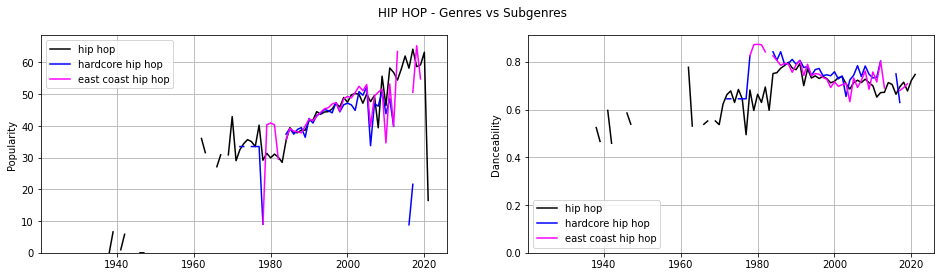

In [46]:
listOfPopulartiyMeansParent = []
popularityMeansSub1 = []
popularityMeansSub2 = []

genreYear(df_hip_hop_time,listOfPopulartiyMeansParent, "popularity_y")
genreYear(df_hip_hop_sub_hardcore, popularityMeansSub1, "popularity_y")
genreYear(df_hip_hop_sub_east_coast, popularityMeansSub2, "popularity_y")

fig, ax = plt.subplots(1,2, figsize=(16,4),squeeze = False)

fig.suptitle("HIP HOP - Genres vs Subgenres", fontsize=12)

ax[0][0].plot(listOfYears, listOfPopulartiyMeansParent, color='black', label='hip hop')
ax[0][0].plot(listOfYears, popularityMeansSub1, color='blue', label='hardcore hip hop')
ax[0][0].plot(listOfYears, popularityMeansSub2, color='magenta', label='east coast hip hop')
ax[0][0].set_ylim(0)
ax[0][0].grid(True)
ax[0][0].legend()
ax[0][0].set_ylabel("Popularity")
######################################
listOfDanceabilityMeansParent = []
danceabilityMeansSub1 = []
danceabilityMeansSub2 = []

genreYear(df_hip_hop_time,listOfDanceabilityMeansParent, "danceability_y")
genreYear(df_hip_hop_sub_hardcore, danceabilityMeansSub1, "danceability_y")
genreYear(df_hip_hop_sub_east_coast, danceabilityMeansSub2, "danceability_y")


ax[0][1].plot(listOfYears, listOfDanceabilityMeansParent, color='black', label='hip hop')
ax[0][1].plot(listOfYears, danceabilityMeansSub1, color='blue', label='hardcore hip hop')
ax[0][1].plot(listOfYears, danceabilityMeansSub2, color='magenta', label='east coast hip hop')
ax[0][1].set_ylim(0)
ax[0][1].grid(True)
ax[0][1].legend()
ax[0][1].set_ylabel("Danceability")
###############################

plt.show()

<font color="#1DB954">**Hip-Hop:**</font> Selected sub-genres lose popularity at some times however parent genre seems to be more stable in terms of popularity. Aksi we can see that rises and falls in danceability of the main genre affects sub-genres as well they rise and fall at the same time. Also, the main genre is more stable while subgenre danceability varies a lot from time to time. 

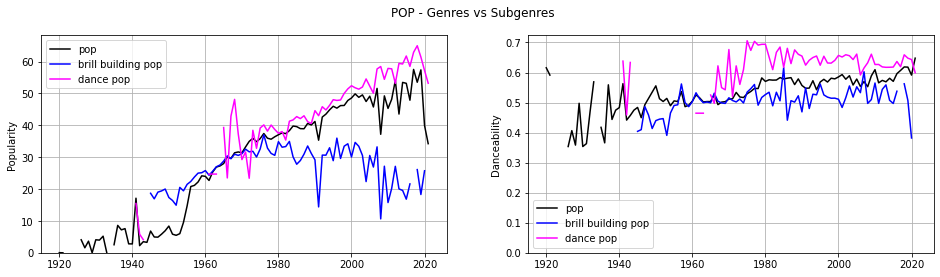

In [47]:
listOfPopulartiyMeansParent = []
popularityMeansSub1 = []
popularityMeansSub2 = []

genreYear(df_pop_time,listOfPopulartiyMeansParent, "popularity_y")
genreYear(df_pop_sub_brill_building, popularityMeansSub1, "popularity_y")
genreYear(df_pop_sub_dance, popularityMeansSub2, "popularity_y")

fig, ax = plt.subplots(1,2, figsize=(16,4),squeeze = False)

fig.suptitle("POP - Genres vs Subgenres", fontsize=12)

ax[0][0].plot(listOfYears, listOfPopulartiyMeansParent, color='black', label='pop')
ax[0][0].plot(listOfYears, popularityMeansSub1, color='blue', label='brill building pop')
ax[0][0].plot(listOfYears, popularityMeansSub2, color='magenta', label='dance pop')
ax[0][0].set_ylim(0)
ax[0][0].grid(True)
ax[0][0].legend()
ax[0][0].set_ylabel("Popularity")
######################################
listOfDanceabilityMeansParent = []
danceabilityMeansSub1 = []
danceabilityMeansSub2 = []

genreYear(df_pop_time,listOfDanceabilityMeansParent, "danceability_y")
genreYear(df_pop_sub_brill_building, danceabilityMeansSub1, "danceability_y")
genreYear(df_pop_sub_dance, danceabilityMeansSub2, "danceability_y")


ax[0][1].plot(listOfYears, listOfDanceabilityMeansParent, color='black', label='pop')
ax[0][1].plot(listOfYears, danceabilityMeansSub1, color='blue', label='brill building pop')
ax[0][1].plot(listOfYears, danceabilityMeansSub2, color='magenta', label='dance pop')
ax[0][1].set_ylim(0)
ax[0][1].grid(True)
ax[0][1].legend()
ax[0][1].set_ylabel("Danceability")
###############################

plt.show()

<font color="#1DB954">**Pop:**</font> We see that pop started brill building pop is declining in popularity while the main pop genre and dance-pop genre are rising quite rapidly. We can see that dance-pop is more popular than average pop music. Also, the dance-pop genre is quite unsurprisingly more danceable than the parent pop genre.

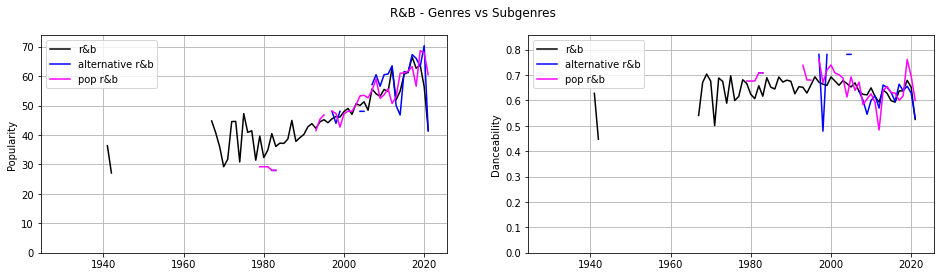

In [48]:
listOfPopulartiyMeansParent = []
popularityMeansSub1 = []
popularityMeansSub2 = []

genreYear(df_rnb_time,listOfPopulartiyMeansParent, "popularity_y")
genreYear(df_rnb_sub_alternative, popularityMeansSub1, "popularity_y")
genreYear(df_rnb_sub_pop, popularityMeansSub2, "popularity_y")

fig, ax = plt.subplots(1,2, figsize=(16,4),squeeze = False)

fig.suptitle("R&B - Genres vs Subgenres", fontsize=12)

ax[0][0].plot(listOfYears, listOfPopulartiyMeansParent, color='black', label='r&b')
ax[0][0].plot(listOfYears, popularityMeansSub1, color='blue', label='alternative r&b')
ax[0][0].plot(listOfYears, popularityMeansSub2, color='magenta', label='pop r&b')
ax[0][0].set_ylim(0)
ax[0][0].grid(True)
ax[0][0].legend()
ax[0][0].set_ylabel("Popularity")
######################################
listOfDanceabilityMeansParent = []
danceabilityMeansSub1 = []
danceabilityMeansSub2 = []

genreYear(df_rnb_time,listOfDanceabilityMeansParent, "danceability_y")
genreYear(df_rnb_sub_alternative, danceabilityMeansSub1, "danceability_y")
genreYear(df_rnb_sub_pop, danceabilityMeansSub2, "danceability_y")


ax[0][1].plot(listOfYears, listOfDanceabilityMeansParent, color='black', label='r&b')
ax[0][1].plot(listOfYears, danceabilityMeansSub1, color='blue', label='alternative r&b')
ax[0][1].plot(listOfYears, danceabilityMeansSub2, color='magenta', label='pop r&b')
ax[0][1].set_ylim(0)
ax[0][1].grid(True)
ax[0][1].legend()
ax[0][1].set_ylabel("Danceability")
######################################

plt.show()

<font color="#1DB954">**R&B:**</font> It seems like pop R&B and alternative R&B are generally more popular than the general R&B genre. Also, the popularity of pop R&B is more consistent compared to the R&B genre as a whole and alternative R&B. Dancibliy values of sub-genres seem relatively comparable to parent genres except for some changes.

## Hyphotesis Testing

In [28]:
df2 = pd.read_csv("https://dsc.cloud/b45dcb/data/data.csv")
df_genres2 = pd.read_csv("https://dsc.cloud/b45dcb/data_by_genres/data_by_genres.csv")
df_artists2 = pd.read_csv("https://dsc.cloud/b45dcb/data_by_artist/data_by_artist.csv")
df_year2 = pd.read_csv("https://dsc.cloud/b45dcb/data_by_year/data_by_year.csv")
df_genresBig2 = pd.read_csv("https://dsc.cloud/b45dcb/data_w_genres/data_w_genres.csv")

In [29]:
df2['artists'] = df2['artists'].apply(lambda x: re.findall(r'[\']([\w\s-]+)[\']', x))
df2_exploded = df2.explode('artists')
df2_exploded.dropna(how = 'any', inplace=True)

In [30]:
df_genresBig2.dropna(how = 'any', inplace=True)

In [31]:
merged = pd.merge(df2_exploded, df_genresBig2, on="artists")
merged.head()

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,...,liveness_y,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,key_y,mode_y,count,genres
0,0.991,Mamie Smith,0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,...,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,"['harlem renaissance', 'traditional blues']"
1,0.993,Mamie Smith,0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.519,...,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,"['harlem renaissance', 'traditional blues']"
2,0.992,Mamie Smith,0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.176,...,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,"['harlem renaissance', 'traditional blues']"
3,0.995,Mamie Smith,0.482,198000,0.2290,0,0lqEx4vktZP1y9hnwfF27Y,0.000061,7,0.549,...,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,"['harlem renaissance', 'traditional blues']"
4,0.992,Mamie Smith,0.574,189800,0.1380,0,4HYmmG8uHL2hP4zSFWavKF,0.000492,3,0.233,...,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,"['harlem renaissance', 'traditional blues']"


In [32]:
copy_merged = merged

In [33]:
dropList = ['acousticness_y', 'danceability_y', 'duration_ms_y', 'energy_y',
       'instrumentalness_y', 'liveness_y', 'loudness_y', 'speechiness_y',
       'tempo_y', 'valence_y', 'popularity_y', 'key_y', 'mode_y']

In [34]:
merged = merged.drop(dropList, axis = 1)

In [63]:
merged.head()

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,...,mode_x,name,popularity_x,release_date,speechiness_x,tempo_x,valence_x,year,count,genres
0,0.991,Mamie Smith,0.435855,-0.455955,-0.802168,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,...,0,Keep A Song In Your Soul,12,1920,0.0936,1.140915,0.634,1920,16,"['harlem renaissance', 'traditional blues']"
1,0.993,Mamie Smith,0.700318,-0.484566,-0.938934,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.519,...,1,Golfing Papa,4,1920,0.1740,-0.579274,0.689,1920,16,"['harlem renaissance', 'traditional blues']"
2,0.992,Mamie Smith,1.428941,-0.285361,-1.402142,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.176,...,1,Don't You Advertise Your Man,5,1920,0.0592,-0.971682,0.487,1920,16,"['harlem renaissance', 'traditional blues']"
3,0.995,Mamie Smith,-0.190220,-0.267582,-0.784172,0,0lqEx4vktZP1y9hnwfF27Y,0.000061,7,0.549,...,1,Kansas City Man Blues - 78rpm Version,4,1920,0.0812,-1.248221,0.461,1920,16,"['harlem renaissance', 'traditional blues']"
4,0.992,Mamie Smith,0.306323,-0.319649,-1.111693,0,4HYmmG8uHL2hP4zSFWavKF,0.000492,3,0.233,...,1,Miss Jenny's Ball (aka There'll Be No Freebies...,1,1920,0.1090,1.418307,0.764,1920,16,"['harlem renaissance', 'traditional blues']"


#### Hypothesis Test Part A



**<font color="#1DB954">Hypothesis Test:</font>** We want to test whether there are significant differences in terms of popularity and the features duration, danceability, and tempo.

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Mean popularity for all target values are the same. 

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Mean popularity for all target values are different.

**<font color="#1DB954">Significance level:</font>** As most hypothesis tests assume a significance level of 0.05, we are setting it as 0.05 for our test too.

**<font color="#1DB954">Null Hypothesis ( HO ):</font>** Mean duration is the same for different popularity samples
HO: μd1=μd2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Mean duration is not the same for different popularity samples
HA:  Means  μd1 and μd2  are not same.

In [35]:
from scipy.stats import ttest_ind

sample3 =merged[merged["popularity_x"] > merged["popularity_x"].quantile(0.99995)]

ttest_ind(merged["duration_ms_x"], sample3["duration_ms_x"], equal_var=False)

Ttest_indResult(statistic=4.053527416885359, pvalue=0.0066830681723397956)

**<font color="#1DB954">Result:</font>**
As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that mean duration is not the same. Here, we reject the null hypothesis.

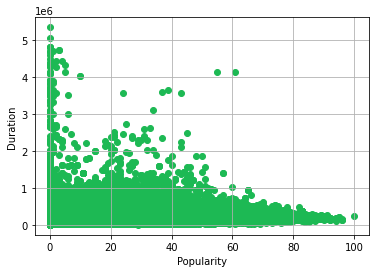

In [36]:
plt.scatter(merged["popularity_x"], merged["duration_ms_x"], color="#1DB954")

plt.xlabel("Popularity")
plt.ylabel("Duration") 

plt.grid(True)
plt.show()

**<font color="#1DB954">Null Hypothesis ( H₀ ):</font>** Mean danceability is the same for different popularity samples
H₀: μd1=μd2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Mean danceability is not the same for different popularity samples
HA:  Means  μd1 and μd2  are not same.

In [37]:

#sample2 = merged[merged["popularity_x"] > 70]
sample3 =merged[merged["popularity_x"] > merged["popularity_x"].quantile(0.99995)]

ttest_ind(merged["danceability_x"], sample3["danceability_x"], equal_var=False)

Ttest_indResult(statistic=-6.6020629487638285, pvalue=0.0005799244218864793)

**<font color="#1DB954">Result:</font>**
As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that mean danceability is not the same. Here, we reject the null hypothesis.

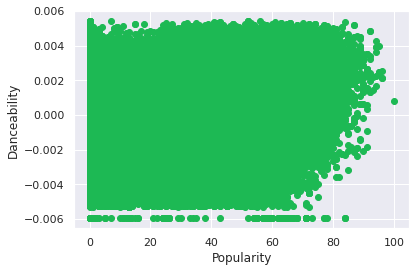

In [248]:
plt.scatter(merged["popularity_x"], merged["danceability_x"], color="#1DB954")

plt.xlabel("Popularity")
plt.ylabel("Danceability") 

plt.grid(True)
plt.show()

**<font color="#1DB954">Null Hypothesis ( H₀ ):</font>** Mean tempo is the same for different popularity samples
H₀: μt1=μt2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Mean tempo is not the same for different popularity samples
HA:  Means  μt1 and μt2  are not same.

In [222]:
sample3 =merged[merged["popularity_x"] > merged["popularity_x"].quantile(0.99995)]

ttest_ind(merged["tempo_x"], sample3["tempo_x"], equal_var=False)

Ttest_indResult(statistic=-0.6190248202534608, pvalue=0.5586535193643949)

**<font color="#1DB954">Result:</font>**
As p-value we obtained is bigger than the threshold significance level 0.05, we can conclude that mean tempo is the same for samples. Here, we do not reject the null hypothesis.

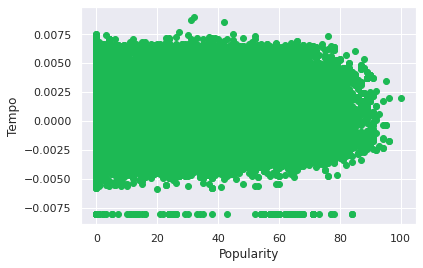

In [249]:
plt.scatter(merged["popularity_x"], merged["tempo_x"], color="#1DB954")

plt.xlabel("Popularity")
plt.ylabel("Tempo") 

plt.grid(True)
plt.show()

### Hypothesis Test Part B

<center><h1>POP</h1></center>

**<font color="#228B22"><h3><u>TEST 1</u></h3></font>**

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Mean of valence is the same for samples of different periods 
H0: μv1=μv2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Mean valence is not the same for samples of different periods
HA:  Means  μv1 and μv2  are not the same.

###
**<font color="#228B22"><h3><u>TEST 2</u></h3></font>**

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Mean of danceability is the same for samples of different periods 
H0: μd1=μd2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Mean danceability is not the same for samples of different periods
HA:  Means  μd1 and μd2  are not the same.

###
**<font color="#228B22"><h3><u>TEST 3</h3></u></font>**  

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Mean of popularity is the same for samples of different periods 
H0: μd1=μd2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Mean popularity is not the same for samples of different periods
HA:  Means  μd1 and μd2  are not the same.

In [53]:
from scipy import stats

df_pop_80s_1 = df_pop_time[df_pop_time["year"] >= 1980]
df_pop_80s = df_pop_80s_1[df_pop_80s_1["year"] < 1990]

df_pop_10s_1 = df_pop_time[df_pop_time["year"] >= 2010]
df_pop_10s = df_pop_10s_1[df_pop_10s_1["year"] < 2020]

#######################
test1 = stats.ttest_ind(df_pop_80s['valence_x'], df_pop_10s['valence_x'], equal_var=False)
test2 = stats.ttest_ind(df_pop_80s['danceability_x'], df_pop_10s['danceability_x'], equal_var=False)
test3 = stats.ttest_ind(df_pop_80s['popularity_x'], df_pop_10s['popularity_x'], equal_var=False)
print(f"Test 1 - Valence: {test1.pvalue:.4f} \nTest 2 - Danceability: {test2.pvalue:.4f} \nTest 3 - Popularity: {test3.pvalue:.4f}")

Test 1 - Valence: 0.0000 
Test 2 - Danceability: 0.8639 
Test 3 - Popularity: 0.0000


**<font color="#1DB954">Results:</font>**
**<font color="#228B22"><h3><u>TEST 1</u></h3></font>**
As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of valence samples are not the same. Here, we reject the null hypothesis.

**<font color="#228B22"><h3><u>TEST 2</u></h3></font>**
As p-value we obtained is bigger than the threshold significance level 0.05, we can conclude that means of danceability samples are the same. Here, we do not reject the null hypothesis.

**<font color="#228B22"><h3><u>TEST 3</u></h3></font>**
As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of popularity samples are not the same. Here, we reject the null hypothesis.

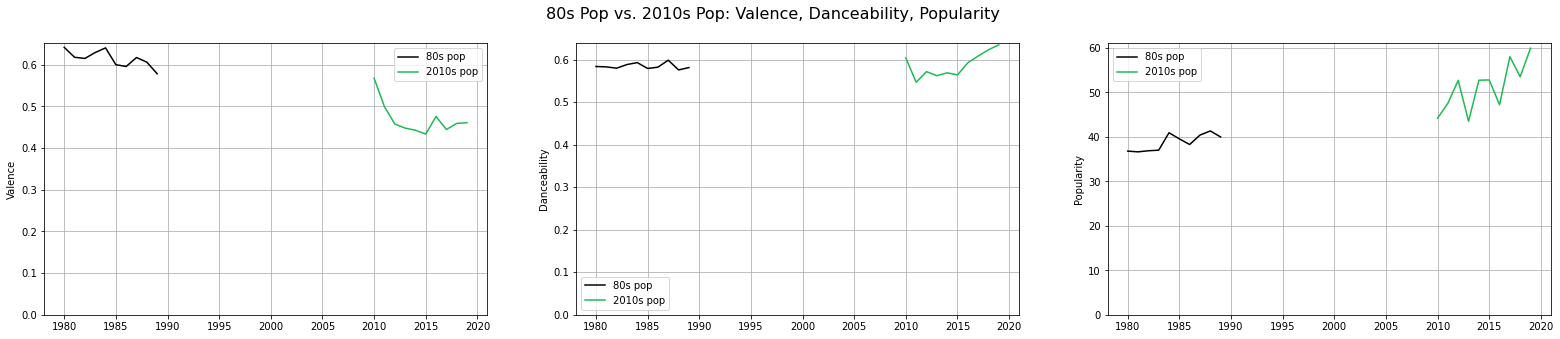

In [112]:
fig, ax = plt.subplots(1,3, figsize=(27,5),squeeze = False)
fig.suptitle("80s Pop vs. 2010s Pop: Valence, Danceability, Popularity", fontsize=16)

######################################
valenceMeans80 = []
valenceMeans10 = []

genreYear(df_pop_80s, valenceMeans80, "valence_x")
genreYear(df_pop_10s, valenceMeans10, "valence_x")

ax[0][0].plot(listOfYears, valenceMeans80, color='black', label='80s pop')
ax[0][0].plot(listOfYears, valenceMeans10, color='#1DB954', label='2010s pop')
ax[0][0].set_ylim(0)
ax[0][0].grid(True)
ax[0][0].legend()
ax[0][0].set_ylabel("Valence", fontsize=10)
######################################
danceabilityMeans80= []
danceabilityMeans10 = []

genreYear(df_pop_80s, danceabilityMeans80, "danceability_x")
genreYear(df_pop_10s, danceabilityMeans10, "danceability_x")

ax[0][1].plot(listOfYears, danceabilityMeans80, color='black', label='80s pop')
ax[0][1].plot(listOfYears, danceabilityMeans10, color='#1DB954', label='2010s pop')
ax[0][1].set_ylim(0)
ax[0][1].grid(True)
ax[0][1].legend()
ax[0][1].set_ylabel("Danceability", fontsize=10)
###############################
popularityMeans80 = []
popularityMeans10 = []

genreYear(df_pop_80s, popularityMeans80, "popularity_x")
genreYear(df_pop_10s, popularityMeans10, "popularity_x")

ax[0][2].plot(listOfYears, popularityMeans80, color='black', label='80s pop')
ax[0][2].plot(listOfYears, popularityMeans10, color='#1DB954', label='2010s pop')
ax[0][2].set_ylim(0)
ax[0][2].grid(True)
ax[0][2].legend()
ax[0][2].set_ylabel("Popularity", fontsize=10)
###############################

plt.show()

<center><h1>METAL</h1></center>

**<font color="#228B22"><h3><u>TEST 1</u></h3></font>**

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Mean of loudness is the same for samples of different periods 
H0: μv1=μv2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Mean loudness is not the same for samples of different periods
HA:  Means  μv1 and μv2  are not the same.

###
**<font color="#228B22"><h3><u>TEST 2</u></h3></font>**

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Mean of danceability is the same for samples of different periods 
H0: μd1=μd2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Mean danceability is not the same for samples of different periods
HA:  Means  μd1 and μd2  are not the same.

###
**<font color="#228B22"><h3><u>TEST 3</h3></u></font>**  

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Mean of popularity is the same for samples of different periods 
H0: μd1=μd2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Mean popularity is not the same for samples of different periods
HA:  Means  μd1 and μd2  are not the same.

In [57]:

df_metal_80s_1 = df_metal_time[df_metal_time["year"] >= 1980]
df_metal_80s = df_metal_80s_1[df_metal_80s_1["year"] < 1990]

df_metal_00s_1 = df_metal_time[df_metal_time["year"] >= 2000]
df_metal_00s = df_metal_00s_1[df_metal_00s_1["year"] < 2010]


test1 = stats.ttest_ind(df_metal_80s['loudness_x'], df_metal_00s['loudness_x'], equal_var=False)
test2 = stats.ttest_ind(df_metal_80s['danceability_x'], df_metal_00s['danceability_x'], equal_var=False)
test3 = stats.ttest_ind(df_metal_80s['popularity_x'], df_metal_00s['popularity_x'], equal_var=False)
print(f"Test 1 - Loudness: {test1.pvalue:.4f} \nTest 2 - Danceability: {test2.pvalue:.4f} \nTest 3 - Popularity: {test3.pvalue:.4f}")

Test 1 - Loudness: 0.0000 
Test 2 - Danceability: 0.0000 
Test 3 - Popularity: 0.0000


**<font color="#1DB954">Results:</font>**
**<font color="#228B22"><h3><u>TEST 1</u></h3></font>**
As the p-value we obtained is smaller than the threshold significance level of 0.05, we can conclude that means of valence samples are not the same. Here, we reject the null hypothesis.

**<font color="#228B22"><h3><u>TEST 2</u></h3></font>**
As the p-value we obtained is smaller than the threshold significance level of 0.05, we can conclude that means of valence samples are not the same. Here, we reject the null hypothesis.

**<font color="#228B22"><h3><u>TEST 3</u></h3></font>**
As the p-value we obtained is smaller than the threshold significance level of 0.05, we can conclude that means of valence samples are not the same. Here, we reject the null hypothesis.

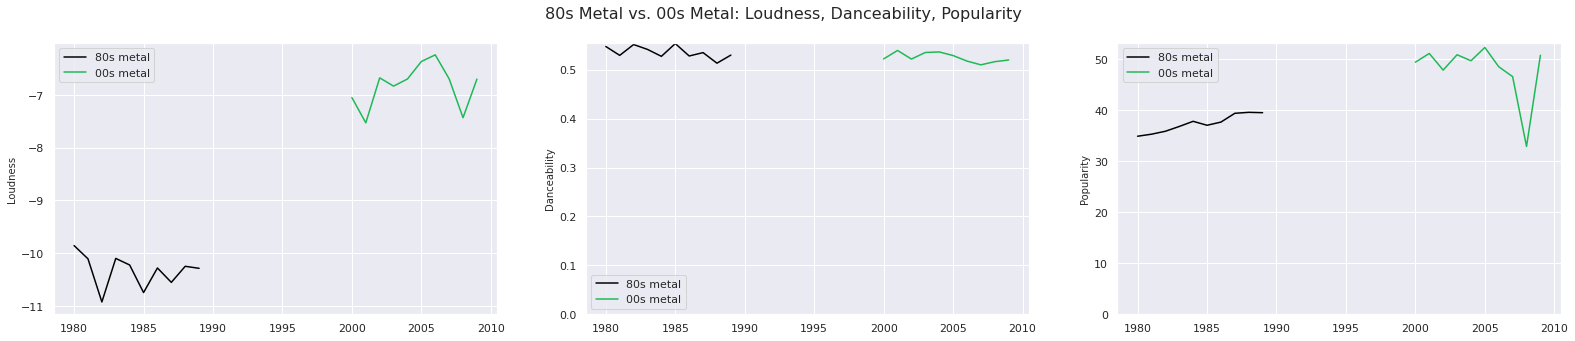

In [256]:
fig, ax = plt.subplots(1,3, figsize=(27,5),squeeze = False)
fig.suptitle("80s Metal vs. 00s Metal: Loudness, Danceability, Popularity", fontsize=16)

######################################
loudnessMeans80 = []
loudnessMeans00 = []

genreYear(df_metal_80s, loudnessMeans80, "loudness_x")
genreYear(df_metal_00s, loudnessMeans00, "loudness_x")

ax[0][0].plot(listOfYears, loudnessMeans80, color='black', label='80s metal')
ax[0][0].plot(listOfYears, loudnessMeans00, color='#1DB954', label='00s metal')
ax[0][0].grid(True)
ax[0][0].legend()
ax[0][0].set_ylabel("Loudness", fontsize=10)
######################################
danceabilityMeans80= []
danceabilityMeans00 = []

genreYear(df_metal_80s, danceabilityMeans80, "danceability_x")
genreYear(df_metal_00s, danceabilityMeans00, "danceability_x")

ax[0][1].plot(listOfYears, danceabilityMeans80, color='black', label='80s metal')
ax[0][1].plot(listOfYears, danceabilityMeans00, color='#1DB954', label='00s metal')
ax[0][1].set_ylim(0)
ax[0][1].grid(True)
ax[0][1].legend()
ax[0][1].set_ylabel("Danceability", fontsize=10)
###############################
popularityMeans80 = []
popularityMeans00 = []

genreYear(df_metal_80s, popularityMeans80, "popularity_x")
genreYear(df_metal_00s, popularityMeans00, "popularity_x")

ax[0][2].plot(listOfYears, popularityMeans80, color='black', label='80s metal')
ax[0][2].plot(listOfYears, popularityMeans00, color='#1DB954', label='00s metal')
ax[0][2].set_ylim(0)
ax[0][2].grid(True)
ax[0][2].legend()
ax[0][2].set_ylabel("Popularity", fontsize=10)
###############################

plt.show()

<center><h1>ROCK</h1></center>

**<font color="#228B22"><h3><u>TEST 1</u></h3></font>**

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Mean of valence is the same for samples of different periods 
H0: μv1=μv2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Mean valence is not the same for samples of different periods
HA:  Means  μv1 and μv2  are not the same.

###
**<font color="#228B22"><h3><u>TEST 2</u></h3></font>**

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Mean of tempo is the same for samples of different periods 
H0: μd1=μd2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Mean tempo is not the same for samples of different periods
HA:  Means  μd1 and μd2  are not the same.

###
**<font color="#228B22"><h3><u>TEST 3</h3></u></font>**  

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Mean of popularity is the same for samples of different periods 
H0: μd1=μd2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Mean popularity is not the same for samples of different periods
HA:  Means  μd1 and μd2  are not the same.

In [58]:
df_rock_70s_1 = df_rock_time[df_rock_time["year"] >= 1970]
df_rock_70s = df_rock_70s_1[df_rock_70s_1["year"] < 1980]

df_rock_10s_1 = df_rock_time[df_rock_time["year"] >= 2010]
df_rock_10s = df_rock_10s_1[df_rock_10s_1["year"] < 2020]

test1 = stats.ttest_ind(df_rock_70s['valence_x'], df_rock_10s['valence_x'], equal_var=False)
test2 = stats.ttest_ind(df_rock_70s['tempo_x'], df_rock_10s['tempo_x'], equal_var=False)
test3 = stats.ttest_ind(df_rock_70s['popularity_x'], df_rock_10s['popularity_x'], equal_var=False)
print(f"Test 1 - Valence: {test1.pvalue:.4f} \nTest 2 - Tempo: {test2.pvalue:.4f} \nTest 3 - Popularity: {test3.pvalue:.4f}")

Test 1 - Valence: 0.0000 
Test 2 - Tempo: 0.0010 
Test 3 - Popularity: 0.0378


**<font color="#1DB954"><h2>Results:</h2></font>**
**<font color="#228B22"><h3><u>TEST 1</u></h3></font>**
As the p-value we obtained is smaller than the threshold significance level of 0.05, we can conclude that mean valence samples are not the same. Here, we reject the null hypothesis.

**<font color="#228B22"><h3><u>TEST 2</u></h3></font>**
As the p-value we obtained is smaller than the threshold significance level of 0.05, we can conclude that means of tempo samples are not the same. Here, we reject the null hypothesis.

**<font color="#228B22"><h3><u>TEST 3</u></h3></font>**
As the p-value we obtained is smaller than the threshold significance level of 0.05, we can conclude that means of popularity samples are not the same. Here, we reject the null hypothesis.

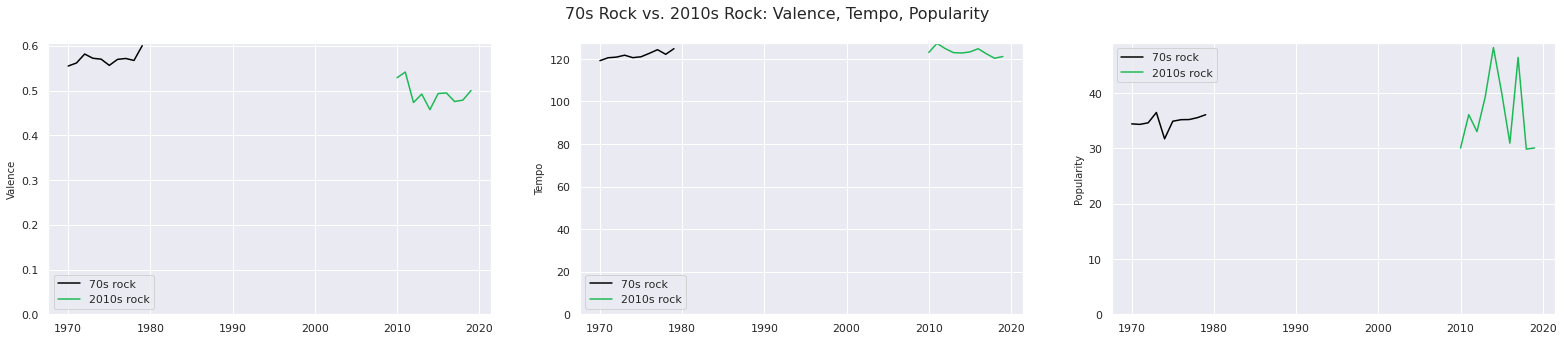

In [150]:
fig, ax = plt.subplots(1,3, figsize=(27,5),squeeze = False)
fig.suptitle("70s Rock vs. 2010s Rock: Valence, Tempo, Popularity", fontsize=16)

######################################
valenceMeans70 = []
valenceMeans10 = []

genreYear(df_rock_70s, valenceMeans70, "valence_x")
genreYear(df_rock_10s, valenceMeans10, "valence_x")

ax[0][0].plot(listOfYears, valenceMeans70, color='black', label='70s rock')
ax[0][0].plot(listOfYears, valenceMeans10, color='#1DB954', label='2010s rock')
ax[0][0].set_ylim(0)
ax[0][0].grid(True)
ax[0][0].legend()
ax[0][0].set_ylabel("Valence", fontsize=10)
######################################
tempoMeans70= []
tempoMeans10 = []

genreYear(df_rock_70s, tempoMeans70, "tempo_x")
genreYear(df_rock_10s, tempoMeans10, "tempo_x")

ax[0][1].plot(listOfYears, tempoMeans70, color='black', label='70s rock')
ax[0][1].plot(listOfYears, tempoMeans10, color='#1DB954', label='2010s rock')
ax[0][1].set_ylim(0)
ax[0][1].grid(True)
ax[0][1].legend()
ax[0][1].set_ylabel("Tempo", fontsize=10)
###############################
popularityMeans70 = []
popularityMeans10 = []

genreYear(df_rock_70s, popularityMeans70, "popularity_x")
genreYear(df_rock_10s, popularityMeans10, "popularity_x")

ax[0][2].plot(listOfYears, popularityMeans70, color='black', label='70s rock')
ax[0][2].plot(listOfYears, popularityMeans10, color='#1DB954', label='2010s rock')
ax[0][2].set_ylim(0)
ax[0][2].grid(True)
ax[0][2].legend()
ax[0][2].set_ylabel("Popularity", fontsize=10)
###############################

plt.show()

<center><h1>HIP HOP</h1></center>

**<font color="#228B22"><h3><u>TEST 1</u></h3></font>**

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Means of danceability is the same for samples of different periods 
H0: μd1=μd2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Means of danceability  samples are not the same for samples of different periods
HA:  Means  μd1 and μd2  are not the same.

###
**<font color="#228B22"><h3><u>TEST 2</u></h3></font>**

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Means of tempo is the same for samples of different periods 
H0: μt1=μt2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Means of tempo samples are not the same for samples of different periods
HA:  Means  μt1 and μt2  are not the same.

###
**<font color="#228B22"><h3><u>TEST 3</h3></u></font>**  

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Means of popularity is the same for samples of different periods 
H0: μp1=μp2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Means of popularity samples are not the same for samples of different periods 
HA:  Means  μp1 and μp2  are not the same.

In [59]:
df_hip_hop_80s_1 = df_hip_hop_time[df_hip_hop_time["year"] >= 1980]
df_hip_hop_80s = df_hip_hop_80s_1[df_hip_hop_80s_1["year"] < 1990]

df_hip_hop_90s_1 = df_hip_hop_time[df_hip_hop_time["year"] >= 1990]
df_hip_hop_90s = df_hip_hop_90s_1[df_hip_hop_90s_1["year"] < 2000]
#####################
test1 = stats.ttest_ind(df_hip_hop_80s['danceability_x'], df_hip_hop_90s['danceability_x'], equal_var=False)
test2 = stats.ttest_ind(df_hip_hop_80s['tempo_x'], df_hip_hop_90s['tempo_x'], equal_var=False)
test3 = stats.ttest_ind(df_hip_hop_80s['popularity_x'], df_hip_hop_90s['popularity_x'], equal_var=False)
print(f"Test 1 - Danceability: {test1.pvalue:.4f} \nTest 2 - Tempo: {test2.pvalue:.4f} \nTest 3 - Popularity: {test3.pvalue:.4f}")

Test 1 - Danceability: 0.0007 
Test 2 - Tempo: 0.0000 
Test 3 - Popularity: 0.0000


**<font color="#1DB954"><h2>Results:</h2></font>**
**<font color="#228B22"><h3><u>TEST 1</u></h3></font>**
As the p-value we obtained is smaller than the threshold significance level of 0.05, we can conclude that means of danceability samples are not the same. Here, we reject the null hypothesis.

**<font color="#228B22"><h3><u>TEST 2</u></h3></font>**
As the p-value we obtained is smaller than the threshold significance level of 0.05, we can conclude that means of tempo samples are not the same. Here, we reject the null hypothesis.

**<font color="#228B22"><h3><u>TEST 3</u></h3></font>**
As the p-value we obtained is smaller than the threshold significance level of 0.05, we can conclude that means of popularity samples are not the same. Here, we reject the null hypothesis.

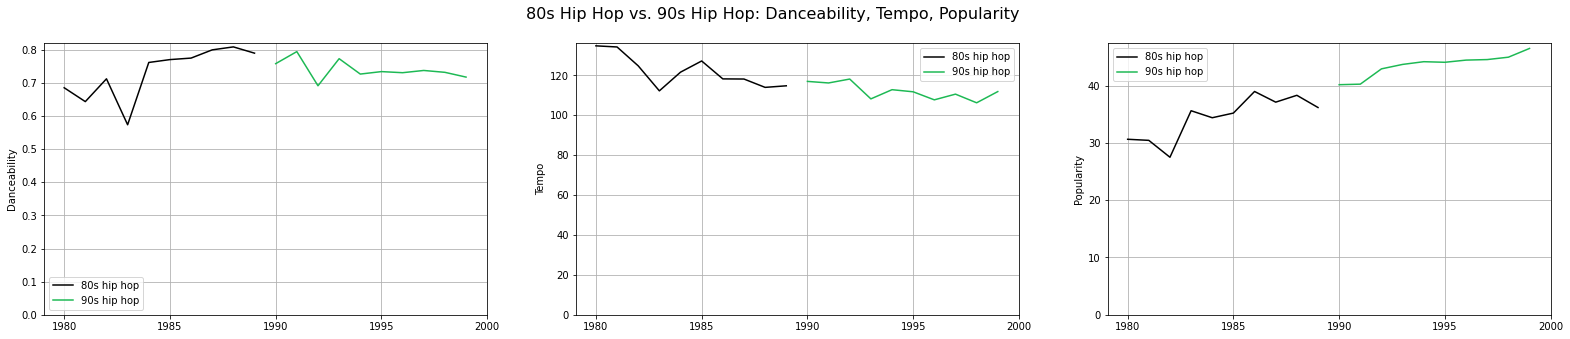

In [131]:
fig, ax = plt.subplots(1,3, figsize=(27,5),squeeze = False)
fig.suptitle("80s Hip Hop vs. 90s Hip Hop: Danceability, Tempo, Popularity", fontsize=16)

######################################
danceabilityMeans80 = []
danceabilityMeans90 = []

genreYear(df_hip_hop_80s, danceabilityMeans80, "danceability_x")
genreYear(df_hip_hop_90s, danceabilityMeans90, "danceability_x")

ax[0][0].plot(listOfYears, danceabilityMeans80, color='black', label='80s hip hop')
ax[0][0].plot(listOfYears, danceabilityMeans90, color='#1DB954', label='90s hip hop')
ax[0][0].set_ylim(0)
ax[0][0].set_xticks(range(1980,2001,5))
ax[0][0].grid(True)
ax[0][0].legend()
ax[0][0].set_ylabel("Danceability", fontsize=10)
######################################
tempoMeans80= []
tempoMeans90 = []

genreYear(df_hip_hop_80s, tempoMeans80, "tempo_x")
genreYear(df_hip_hop_90s, tempoMeans90, "tempo_x")

ax[0][1].plot(listOfYears, tempoMeans80, color='black', label='80s hip hop')
ax[0][1].plot(listOfYears, tempoMeans90, color='#1DB954', label='90s hip hop')
ax[0][1].set_ylim(0)
ax[0][1].set_xticks(range(1980,2001,5))
ax[0][1].grid(True)
ax[0][1].legend()
ax[0][1].set_ylabel("Tempo", fontsize=10)
###############################
popularityMeans80 = []
popularityMeans90 = []

genreYear(df_hip_hop_80s, popularityMeans80, "popularity_x")
genreYear(df_hip_hop_90s, popularityMeans90, "popularity_x")

ax[0][2].plot(listOfYears, popularityMeans80, color='black', label='80s hip hop')
ax[0][2].plot(listOfYears, popularityMeans90, color='#1DB954', label='90s hip hop')
ax[0][2].set_ylim(0)
ax[0][2].set_xticks(range(1980,2001,5))
ax[0][2].grid(True)
ax[0][2].legend()
ax[0][2].set_ylabel("Popularity", fontsize=10)
###############################

plt.show()

### Hypothesis Test Part C

<center><h1>Brill Building Pop vs. Dance Pop</h1></center>

**<font color="#228B22"><h3><u>TEST 1</u></h3></font>**

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Means of danceability is the same for samples of different periods 
H0: μd1=μd2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Means of danceability  samples are not the same for samples of different periods
HA:  Means  μd1 and μd2  are not the same.

###
**<font color="#228B22"><h3><u>TEST 2</u></h3></font>**

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Means of tempo is the same for samples of different periods 
H0: μt1=μt2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Means of tempo samples are not the same for samples of different periods
HA:  Means  μt1 and μt2  are not the same.

###
**<font color="#228B22"><h3><u>TEST 3</h3></u></font>**  

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Means of popularity is the same for samples of different periods 
H0: μp1=μp2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Means of popularity samples are not the same for samples of different periods 
HA:  Means  μp1 and μp2  are not the same.

In [142]:
test1 = stats.ttest_ind(df_pop_sub_brill_building['valence_x'], df_pop_sub_dance['valence_x'], equal_var=False)
test2 = stats.ttest_ind(df_pop_sub_brill_building['danceability_x'], df_pop_sub_dance['danceability_x'], equal_var=False)
test3 = stats.ttest_ind(df_pop_sub_brill_building['popularity_x'], df_pop_sub_dance['popularity_x'], equal_var=False)
print("brill building pop vs. dance pop")
print(f"Test 1 - Valence: {test1.pvalue:.4f} \nTest 2 - Danceability: {test2.pvalue:.4f} \nTest 3 - Popularity: {test3.pvalue:.4f}")

brill building pop vs. dance pop
Test 1 - Valence: 0.0000 
Test 2 - Danceability: 0.0000 
Test 3 - Popularity: 0.0000


**<font color="#1DB954"><h2>Results:</h2></font>**
**<font color="#228B22"><h3><u>TEST 1</u></h3></font>**
As the p-value we obtained is smaller than the threshold significance level of 0.05, we can conclude that means of valence samples are not the same. Here, we reject the null hypothesis.

**<font color="#228B22"><h3><u>TEST 2</u></h3></font>**
As the p-value we obtained is smaller than the threshold significance level of 0.05, we can conclude that means of danceability samples are not the same. Here, we reject the null hypothesis.

**<font color="#228B22"><h3><u>TEST 3</u></h3></font>**
As the p-value we obtained is smaller than the threshold significance level of 0.05, we can conclude that means of popularity samples are not the same. Here, we reject the null hypothesis.

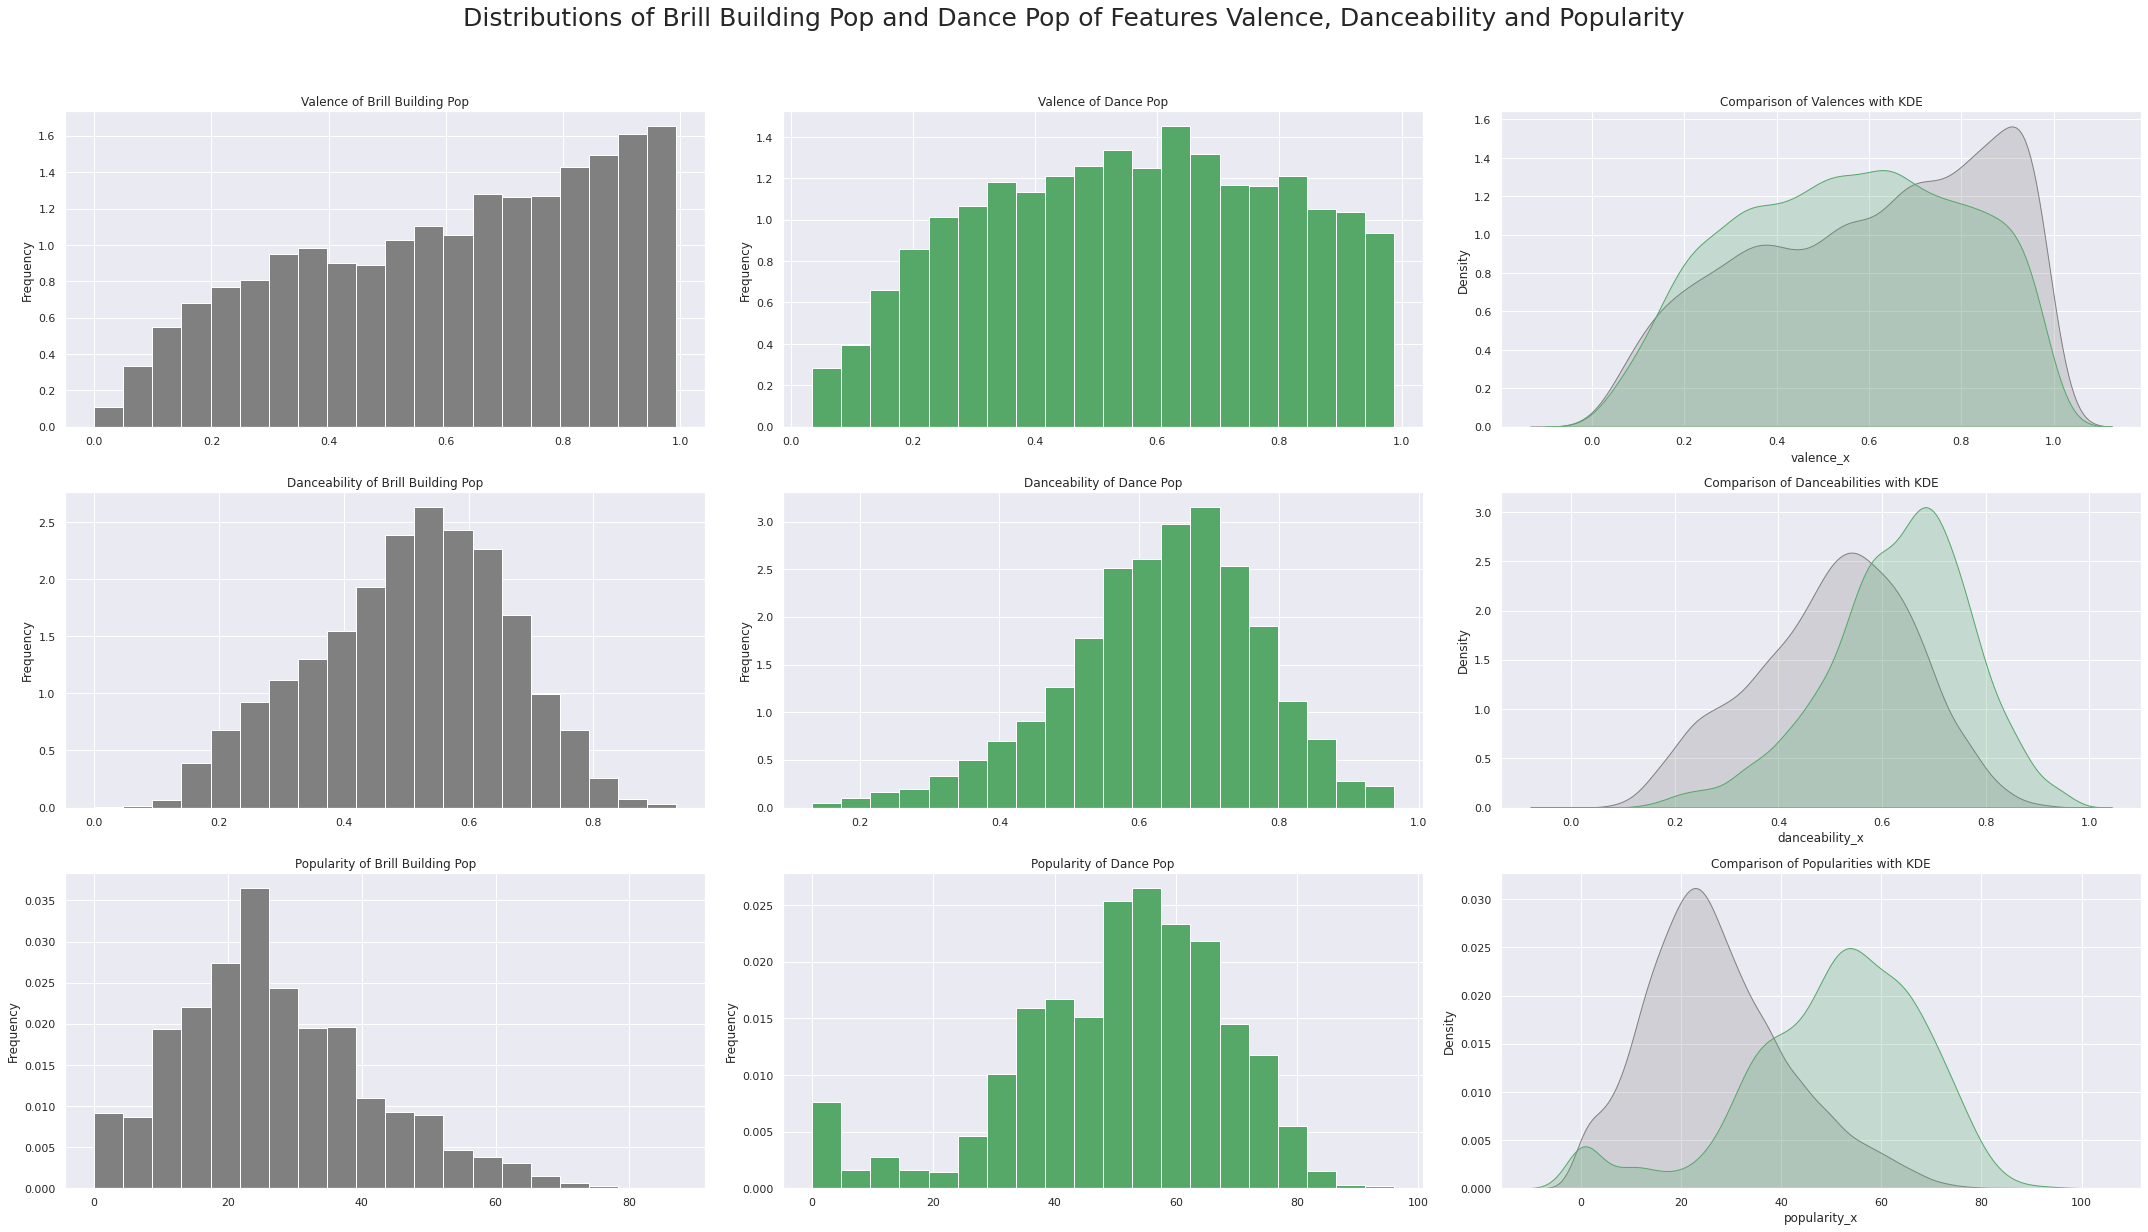

In [224]:
import seaborn as sns

fig, ax = plt.subplots(3, 3, figsize=(30,18))
sns.set_theme()
###########

df_pop_sub_brill_building["valence_x"].plot(kind="hist", ax=ax[0][0], bins=20, label="none", color="grey", density=True)
ax[0][0].set_title("Valence of Brill Building Pop")

df_pop_sub_dance["valence_x"].plot(kind="hist", ax=ax[0][1], bins=20, label="none", color="g", density=True)
ax[0][1].set_title("Valence of Dance Pop")

sns.kdeplot(df_pop_sub_brill_building["valence_x"], shade=True, label="Brill Building Pop", ax=ax[0][2], color="grey")
sns.kdeplot(df_pop_sub_dance["valence_x"], shade=True, label="Dance Pop", ax=ax[0][2], color="g")
ax[0][2].set_title("Comparison of Valences with KDE")

###########

df_pop_sub_brill_building["danceability_x"].plot(kind="hist", ax=ax[1][0], bins=20, label="none", color="grey", density=True)
ax[1][0].set_title("Danceability of Brill Building Pop")

df_pop_sub_dance["danceability_x"].plot(kind="hist", ax=ax[1][1], bins=20, label="none", color="g", density=True)
ax[1][1].set_title("Danceability of Dance Pop")

sns.kdeplot(df_pop_sub_brill_building["danceability_x"], shade=True, label="Brill Building Pop", ax=ax[1][2], color="grey")
sns.kdeplot(df_pop_sub_dance["danceability_x"], shade=True, label="Dance Pop", ax=ax[1][2], color="g")
ax[1][2].set_title("Comparison of Danceabilities with KDE")


###########

df_pop_sub_brill_building["popularity_x"].plot(kind="hist", ax=ax[2][0], bins=20, label="none", color="grey", density=True)
ax[2][0].set_title("Popularity of Brill Building Pop")

df_pop_sub_dance["popularity_x"].plot(kind="hist", ax=ax[2][1], bins=20, label="none", color="g", density=True)
ax[2][1].set_title("Popularity of Dance Pop")

sns.kdeplot(df_pop_sub_brill_building["popularity_x"], shade=True, label="Brill Building Pop", ax=ax[2][2], color="grey")
sns.kdeplot(df_pop_sub_dance["popularity_x"], shade=True, label="Dance Pop", ax=ax[2][2], color="g")
ax[2][2].set_title("Comparison of Popularities with KDE")


############

plt.suptitle("Distributions of Brill Building Pop and Dance Pop of Features Valence, Danceability and Popularity", fontsize=25)
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<center><h1>Nu Metal vs. Alternative Metal</h1></center>

**<font color="#228B22"><h3><u>TEST 1</u></h3></font>**

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Means of loudness is the same for samples of different periods 
H0: μl1=μl2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Means of loudness samples are not the same for samples of different periods
HA:  Means  μl1 and μl2  are not the same.

###
**<font color="#228B22"><h3><u>TEST 2</u></h3></font>**

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Means of danceability is the same for samples of different periods 
H0: μd1=μd2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Means of danceability samples are not the same for samples of different periods
HA:  Means  μd1 and μd2  are not the same.

###
**<font color="#228B22"><h3><u>TEST 3</h3></u></font>**  

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Means of popularity is the same for samples of different periods 
H0: μp1=μp2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Means of popularity samples are not the same for samples of different periods 
HA:  Means  μp1 and μp2  are not the same.

In [145]:
test1 = stats.ttest_ind(df_metal_sub_nu['loudness_x'], df_metal_sub_alternative['loudness_x'], equal_var=False)
test2 = stats.ttest_ind(df_metal_sub_nu['danceability_x'], df_metal_sub_alternative['danceability_x'], equal_var=False)
test3 = stats.ttest_ind(df_metal_sub_nu['popularity_x'], df_metal_sub_alternative['popularity_x'], equal_var=False)
print("nu metal vs. alternative metal")
print(f"Test 1 - Loudness: {test1.pvalue:.4f} \nTest 2 - Danceability: {test2.pvalue:.4f} \nTest 3 - Popularity: {test3.pvalue:.4f}")


nu metal vs. alternative metal
Test 1 - Loudness: 0.0266 
Test 2 - Danceability: 0.0082 
Test 3 - Popularity: 0.1290


**<font color="#1DB954"><h2>Results:</h2></font>**
**<font color="#228B22"><h3><u>TEST 1</u></h3></font>**
As the p-value we obtained is smaller than the threshold significance level of 0.05, we can conclude that means of loudness samples are not the same. Here, we reject the null hypothesis.

**<font color="#228B22"><h3><u>TEST 2</u></h3></font>**
As the p-value we obtained is smaller than the threshold significance level of 0.05, we can conclude that means of danceability samples are not the same. Here, we reject the null hypothesis.

**<font color="#228B22"><h3><u>TEST 3</u></h3></font>**
As the p-value we obtained is smaller than the threshold significance level of 0.05, we can conclude that means of popularity samples are not the same. Here, we reject the null hypothesis.

<center><h1>Album Rock vs. Soft Rock</h1></center>

**<font color="#228B22"><h3><u>TEST 1</u></h3></font>**

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Means of valence is the same for samples of different periods 
H0: μv1=μv2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Means of valence samples are not the same for samples of different periods
HA:  Means  μv1 and μv2  are not the same.

###
**<font color="#228B22"><h3><u>TEST 2</u></h3></font>**

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Means of tempo is the same for samples of different periods 
H0: μt1=μt2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Means of tempo samples are not the same for samples of different periods
HA:  Means  μt1 and μt2  are not the same.

###
**<font color="#228B22"><h3><u>TEST 3</h3></u></font>**  

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Means of popularity is the same for samples of different periods 
H0: μp1=μp2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Means of popularity samples are not the same for samples of different periods 
HA:  Means  μp1 and μp2  are not the same.

In [146]:
test1 = stats.ttest_ind(df_rock_sub_album['valence_x'], df_rock_sub_soft['valence_x'], equal_var=False)
test2 = stats.ttest_ind(df_rock_sub_album['tempo_x'], df_rock_sub_soft['tempo_x'], equal_var=False)
test3 = stats.ttest_ind(df_rock_sub_album['popularity_x'], df_rock_sub_soft['popularity_x'], equal_var=False)
print("album rock vs. soft rock")
print(f"Test 1 - Valence: {test1.pvalue:.4f} \nTest 2 - Tempo: {test2.pvalue:.4f} \nTest 3 - Popularity: {test3.pvalue:.4f}")

album rock vs. soft rock
Test 1 - Valence: 0.0000 
Test 2 - Tempo: 0.0000 
Test 3 - Popularity: 0.0007


**<font color="#1DB954"><h2>Results:</h2></font>**
**<font color="#228B22"><h3><u>TEST 1</u></h3></font>**
As the p-value we obtained is smaller than the threshold significance level of 0.05, we can conclude that means of valence samples are not the same. Here, we reject the null hypothesis.

**<font color="#228B22"><h3><u>TEST 2</u></h3></font>**
As the p-value we obtained is smaller than the threshold significance level of 0.05, we can conclude that means of tempo samples are not the same. Here, we reject the null hypothesis.

**<font color="#228B22"><h3><u>TEST 3</u></h3></font>**
As the p-value we obtained is smaller than the threshold significance level of 0.05, we can conclude that means of popularity samples are not the same. Here, we reject the null hypothesis.

<center><h1>Hardcore Hip Hop vs. East Coast Hip Hop</h1></center>

**<font color="#228B22"><h3><u>TEST 1</u></h3></font>**

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Means of danceability is the same for samples of different periods 
H0: μd1=μd2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Means of danceability samples are not the same for samples of different periods
HA:  Means  μd1 and μd2  are not the same.

###
**<font color="#228B22"><h3><u>TEST 2</u></h3></font>**

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Means of tempo is the same for samples of different periods 
H0: μt1=μt2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Means of tempo samples are not the same for samples of different periods
HA:  Means  μt1 and μt2  are not the same.

###
**<font color="#228B22"><h3><u>TEST 3</h3></u></font>**  

**<font color="#1DB954">Null Hypothesis ( H0 ):</font>** Means of popularity is the same for samples of different periods 
H0: μp1=μp2

**<font color="#1DB954">Alternative Hypothesis ( HA ):</font>** Means of popularity samples are not the same for samples of different periods 
HA:  Means  μp1 and μp2  are not the same.

In [225]:
test1 = stats.ttest_ind(df_hip_hop_sub_hardcore['danceability_x'], df_hip_hop_sub_east_coast['danceability_x'], equal_var=False)
test2 = stats.ttest_ind(df_hip_hop_sub_hardcore['tempo_x'], df_hip_hop_sub_east_coast['tempo_x'], equal_var=False)
test3 = stats.ttest_ind(df_hip_hop_sub_hardcore['popularity_x'], df_hip_hop_sub_east_coast['popularity_x'], equal_var=False)
print("hardcore hip hop vs. east coast hip hop")
print(f"Test 1 - Danceability: {test1.pvalue:.4f} \nTest 2 - Tempo: {test2.pvalue:.4f} \nTest 3 - Popularity: {test3.pvalue:.4f}")

hardcore hip hop vs. east coast hip hop
Test 1 - Danceability: 0.0065 
Test 2 - Tempo: 0.8728 
Test 3 - Popularity: 0.0423


**<font color="#1DB954"><h2>Results:</h2></font>**
**<font color="#228B22"><h3><u>TEST 1</u></h3></font>**
As the p-value we obtained is smaller than the threshold significance level of 0.05, we can conclude that means of valence samples are not the same. Here, we reject the null hypothesis.

**<font color="#228B22"><h3><u>TEST 2</u></h3></font>**
As the p-value we obtained is bigger than the threshold significance level of 0.05, we can conclude that means of tempo samples are the same. Here, we do not reject the null hypothesis.

**<font color="#228B22"><h3><u>TEST 3</u></h3></font>**
As the p-value we obtained is smaller than the threshold significance level of 0.05, we can conclude that means of popularity samples are not the same. Here, we reject the null hypothesis.

## <font color="#1DB954">Future Work</font>

We will continue with the machine learning part of our project. We will try to predict song popularity with various machine learning models and will create a simple song recommendation system.